In [95]:
import torch
import numpy as np
from glob import glob
import os
import matplotlib
PATH = '/home/michael/Dropbox/Master thesis/results_graph-dc/CSVs/ResNet/on_MLP_level/cosine_diff/Feature Analysis/FeatureAnalysisGraph-DC_2_ResNet_lr_0_1_A0_F0_1_F0_1_H10/FedDomSep_GraphDC_gin_on_fs_contest_data_lr0.1_lstep1_/features'

train_test_val = 'train'

save_path = '/home/michael/Dropbox/Master thesis/results_graph-dc/CSVs/ResNet/on_MLP_level/cosine_diff/Feature Analysis/FeatureAnalysisGraph-DC_2_ResNet_lr_0_1_A0_F0_1_F0_1_H10' +'/'+ train_test_val + '/'
if train_test_val == 'train':
    nun_samples = 11649
elif train_test_val == 'val':
    nun_samples = 3883
elif train_test_val == 'test':
    nun_samples = 3889

stage = 1

In [96]:
font = {'size'   : 22}

matplotlib.rc('font', **font)

In [97]:
#interm_trains = {1:[], 2:[],3:[], 4:[],5:[], 6:[],7:[], 8:[],9:[], 10:[],11:[], 12:[],13:[]}
global_trains = {1:[], 2:[],3:[], 4:[],5:[], 6:[],7:[], 8:[],9:[], 10:[],11:[], 12:[],13:[]}
local_trains = {1:[], 2:[],3:[], 4:[],5:[], 6:[],7:[], 8:[],9:[], 10:[],11:[], 12:[],13:[]}
labels = {1:[], 2:[],3:[], 4:[],5:[], 6:[],7:[], 8:[],9:[], 10:[],11:[], 12:[],13:[]}


In [98]:
all_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, '*.pt'))]
all_files.sort()

In [99]:
def get_files(path):
    for client in range(1, 13+1):
        print(client)
        client_path = f"{PATH}/client_{client}"
        all_files = [file
                 for path, subdir, files in os.walk(client_path)
                 for file in glob(os.path.join(path, '*.pt'))]
        all_files.sort()
        for file in all_files:
            file_name = os.path.basename(file)
            file_name_without_ending = file_name[:-3]
            if file_name_without_ending.startswith(f'x_global_{stage}_pooled_' + train_test_val) and not file_name_without_ending.endswith('labels'):
                print(file_name_without_ending)
                global_trains[client].append(torch.load(file).cpu().detach().numpy())
                print(torch.load(file).cpu().detach().numpy().shape)
            if file_name_without_ending.startswith(f'x_local_{stage}_pooled_' + train_test_val) and not file_name_without_ending.endswith('labels'):
                local_trains[client].append(torch.load(file).cpu().detach().numpy())
            if file_name_without_ending.startswith(train_test_val) and file_name_without_ending.endswith('labels'):
                labels[client].append(torch.load(file).cpu().detach().numpy())
        #interm_trains[client] = np.concatenate(interm_trains[client])
        global_trains[client] = np.concatenate(global_trains[client])
        local_trains[client] = np.concatenate(local_trains[client])
        labels[client] = np.concatenate(labels[client])


In [100]:
get_files(PATH)

1
x_global_1_pooled_train_0
(64, 64)
x_global_1_pooled_train_1
(48, 64)
2
x_global_1_pooled_train_0
(64, 64)
x_global_1_pooled_train_1
(64, 64)
x_global_1_pooled_train_2
(64, 64)
x_global_1_pooled_train_3
(51, 64)
3
x_global_1_pooled_train_0
(64, 64)
x_global_1_pooled_train_1
(64, 64)
x_global_1_pooled_train_2
(64, 64)
x_global_1_pooled_train_3
(64, 64)
x_global_1_pooled_train_4
(24, 64)
4
x_global_1_pooled_train_0
(64, 64)
x_global_1_pooled_train_1
(64, 64)
x_global_1_pooled_train_2
(64, 64)
x_global_1_pooled_train_3
(64, 64)
x_global_1_pooled_train_4
(64, 64)
x_global_1_pooled_train_5
(64, 64)
x_global_1_pooled_train_6
(64, 64)
x_global_1_pooled_train_7
(5, 64)
5
x_global_1_pooled_train_0
(64, 64)
x_global_1_pooled_train_1
(64, 64)
x_global_1_pooled_train_2
(64, 64)
x_global_1_pooled_train_3
(14, 64)
6
x_global_1_pooled_train_0
(64, 64)
x_global_1_pooled_train_1
(64, 64)
x_global_1_pooled_train_10
(64, 64)
x_global_1_pooled_train_11
(64, 64)
x_global_1_pooled_train_12
(64, 64)
x_glob

In [101]:
import numpy as np
#concat_X=global_train
data_out_local_global = {}
data_out_local = {}
data_out_global = {}

for key in local_trains.keys():
    data_out_local_global[key] = global_trains[key] + local_trains[key]
    data_out_local[key] = local_trains[key]
    data_out_global[key] = global_trains[key]

X_concat_local_global = []
X_concat_local = []
X_concat_global = []
labels_concat = []

for key in local_trains.keys():
    X_concat_local_global.append(data_out_local_global[key])
    X_concat_local.append(data_out_local[key])
    X_concat_global.append(data_out_global[key])
    labels_concat.append(labels[key])

X_concat_local_global = np.concatenate(X_concat_local_global)
X_concat_local = np.concatenate(X_concat_local)
X_concat_global = np.concatenate(X_concat_global)

labels_concat = np.concatenate(labels_concat)

In [102]:
labels_concat.shape

(11649,)

In [103]:
global_trains[1].shape

(112, 64)

In [104]:
labels[1].shape

(112,)

In [105]:
from sklearn.manifold import TSNE

In [106]:
labels_global = labels.copy()


In [107]:
X_concat = np.concatenate([X_concat_local_global, X_concat_local, X_concat_global])
labels_double_concat = np.concatenate([labels_concat, labels_concat, labels_concat])

In [108]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=25).fit_transform(X_concat, labels_double_concat)

In [109]:
X_embedded.shape[0]//2

17473

In [110]:
# Feature Analysis for client 9:
global_trains[9]

array([[ 0.01744361,  0.00378639, -0.30693993, ..., -0.1266926 ,
        -0.04422013, -0.01582482],
       [ 0.06913862, -0.00185553, -0.26093426, ..., -0.1502295 ,
        -0.07614882, -0.04096295],
       [ 0.05388269, -0.00630941, -0.31316873, ..., -0.1539591 ,
        -0.07000639, -0.0230754 ],
       ...,
       [ 0.09224094, -0.00551614, -0.23144636, ..., -0.18740554,
        -0.09944217, -0.00666819],
       [ 0.07341248,  0.02577717, -0.27960232, ..., -0.16450967,
        -0.06865241, -0.00418278],
       [ 0.06734441,  0.01284727, -0.25159192, ..., -0.14469786,
        -0.07081706, -0.00217386]], dtype=float32)

In [111]:
local_trains[9]

array([[ 3.10729388e-02,  3.91420834e-02,  5.17188311e-02, ...,
        -3.09048370e-02, -3.35283689e-02, -6.08676933e-02],
       [ 3.96137945e-02, -1.38747871e-01,  5.20499237e-02, ...,
         6.33153021e-02, -7.39514455e-02, -1.44954428e-01],
       [ 5.97983319e-03,  3.32357734e-02,  5.21821864e-02, ...,
         7.50672724e-03,  2.36620312e-03, -2.45353766e-02],
       ...,
       [-4.06071953e-02,  2.16878653e-02,  5.23770042e-02, ...,
         7.82662407e-02,  1.85968399e-01,  1.47991683e-02],
       [-3.10147684e-02,  1.12835383e-04,  5.24970256e-02, ...,
         2.30797809e-02,  1.69474222e-02,  2.89456602e-02],
       [-1.96836013e-02,  4.75003645e-02,  5.20997420e-02, ...,
         4.54132445e-03,  8.05676058e-02,  1.33589385e-02]], dtype=float32)

In [112]:
cos_sim = torch.nn.CosineSimilarity()

In [113]:
isExist = os.path.exists(save_path)
if not isExist:
    os.makedirs(save_path)

In [114]:
import pandas as pd

df = pd.DataFrame()

In [115]:
num_total_features = []
num_local_features_not_0 = []
avg_local_features_not_0 = []
num_global_features_not_0 = []
num_features_global_local = []
avg_global_features_not_0 = []
num_local_global_features_not_0 = []
avg_local_global_features_not_0 = []
cos_sim_local_global = []
cos_sim_local_local_global = []
cos_sim_global_local_global = []

In [116]:
for client in range(1, 13+1):


    local_train_curr = local_trains[client]
    global_train_curr = global_trains[client]

    num_total_features.append(local_train_curr.shape[0] * local_train_curr.shape[1])
    num_total_features_curr = local_train_curr.shape[0] * local_train_curr.shape[1]

    local_global = local_train_curr + global_train_curr

    mult_local_global = global_train_curr*local_train_curr

    num_local_features_not_0.append(np.sum(local_train_curr != 0) / num_total_features_curr)
    avg_local_features_not_0.append(local_train_curr.sum() / np.sum(local_train_curr != 0))
    num_global_features_not_0.append(np.sum(global_train_curr != 0) / num_total_features_curr)
    avg_global_features_not_0.append(global_train_curr.sum() / np.sum(global_train_curr != 0))
    num_local_global_features_not_0.append(np.sum(local_global != 0) / num_total_features_curr)
    avg_local_global_features_not_0.append(local_global.sum() / np.sum(local_global != 0))

    num_features_global_local.append(np.sum(mult_local_global != 0) / num_total_features_curr)

    cos_sim_local_global.append(cos_sim(torch.Tensor(global_train_curr), torch.Tensor(local_train_curr)).mean().item())
    cos_sim_local_local_global.append(cos_sim(torch.Tensor(local_train_curr), torch.Tensor(local_global)).mean().item())
    cos_sim_global_local_global.append(cos_sim(torch.Tensor(global_train_curr), torch.Tensor(local_global)).mean().item())
    """
    print(f"############ Client {client} ##############")
    print(f"total features: {round(num_total_features,2)}")
    print(f"num_local_features_not_0:\n{round(num_local_features_not_0,2)}")
    print(f"avg_local_features_not_0:\n{round(avg_local_features_not_0,2)}")

    print(f"num_global_features_not_0:\n{round(num_global_features_not_0,2)}")
    print(f"num_features_global_local:\n{round(num_features_global_local,2)}")
    print(f"avg_global_features_not_0:\n{round(avg_global_features_not_0,2)}")

    print(f"num_local_global_features_not_0:\n{round(num_local_global_features_not_0,2)}")
    print(f"avg_local_global_features_not_0:\n{round(avg_local_global_features_not_0,2)}")

    print(f"cos_sim_global_local:\n{round(cos_sim_local_global,2)}")
    print(f"cos_sim_local_local_global:\n{round(cos_sim_local_local_global,2)}")
    print(f"cos_sim_global_local_global:\n{round(cos_sim_global_local_global,2)}")

    """

In [117]:
data_map = {
    ('total','# Features'): num_total_features,
    ('local', '# features != 0'): num_local_features_not_0,
    ('local', 'avg features != 0'): avg_local_features_not_0,
    ('global', '# features != 0'): num_global_features_not_0,
    ('global', '# Features != 0 in both local and global'): num_features_global_local,
    ('global', 'avg features != 0'): avg_global_features_not_0,
    ('local-global', '# features != 0'): num_local_global_features_not_0,
    ('local-global', 'avg features != 0'): avg_local_global_features_not_0,
    ('cos_sim', 'local_global',): cos_sim_local_global,
    ('cos_sim', 'local__local-global',): cos_sim_local_local_global,
    ('cos_sim', 'global__local-global',): cos_sim_global_local_global,
}
df = pd.DataFrame(data=data_map)
df.to_csv(save_path + f'statistics_stage{stage}.csv')

In [118]:
X_embedded_local_global = X_embedded[:nun_samples,:]
X_embedded_local = X_embedded[nun_samples:nun_samples+nun_samples,:]
X_embedded_global = X_embedded[nun_samples+nun_samples:,:]


In [119]:
X_embedded.shape[0]/3

11649.0

In [120]:
nun_samples

11649

In [121]:
#X_embedded_global = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=25).fit_transform(X_concat_global, labels_concat)
#X_embedded_local = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=25).fit_transform(X_concat_interm, labels_concat)
#X_embedded_interm = X_embedded_local

In [122]:
#X_embedded_interm = X_embedded_local

In [123]:
X_embedded_global_clients = {}
X_embedded_local_clients = {}
X_embedded_local_global_clients = {}
labels_clients = {}
total_size = 0

for client in range(1, 13+1):
    print(f"size client {client}: {local_trains[client].shape[0]}")
    size = local_trains[client].shape[0]
    size_old = total_size
    total_size += size
    X_embedded_global_clients[client] = X_embedded_global[size_old:total_size,:]
    X_embedded_local_clients[client] = X_embedded_local[size_old:total_size,:]
    X_embedded_local_global_clients[client] = X_embedded_local_global[size_old:total_size,:]
    labels_clients[client] = labels_concat[size_old:total_size]

size client 1: 112
size client 2: 243
size client 3: 280
size client 4: 453
size client 5: 206
size client 6: 1200
size client 7: 2466
size client 8: 2602
size client 9: 2476
size client 10: 201
size client 11: 210
size client 12: 600
size client 13: 600


In [124]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30, 18))
plt.rcParams["figure.figsize"] = (30,18)
plt.rc('xtick', labelsize=32)    # fontsize of the tick labels
plt.rc('ytick', labelsize=32)    # fontsize of the tick labels
plt.rc('legend', fontsize=32)
plt.rc('font', size=32)

<Figure size 3000x1800 with 0 Axes>

In [125]:
"""yellow: label=1"""

'yellow: label=1'

In [126]:
client_num = 13

In [127]:
save_path

'/home/michael/Dropbox/Master thesis/results_graph-dc/CSVs/ResNet/on_MLP_level/cosine_diff/Feature Analysis/FeatureAnalysisGraph-DC_2_ResNet_lr_0_1_A0_F0_1_F0_1_H10/train/'

In [128]:
colors=['red', 'blue']
for client in range(1, client_num+1):
    for i in range(1+1):
        labels_use = labels_clients[client] == i
        X_use = X_embedded_global_clients[client][labels_use, :]
        plt.scatter(X_use[:, 0], X_use[:, 1], c=[colors[i]]*X_use.shape[0], label=f'Label = {i}', s=60, )
    plt.xlim(-120, 120)
    plt.ylim(-120, 120)
    plt.legend(prop={'size': 26}, markerscale=2)
    plt.savefig(save_path + 'client_' + str(client) + '_global')
    plt.clf()

    for i in range(1+1):
        labels_use = labels_clients[client] == i
        X_use = X_embedded_local_clients[client][labels_use, :]
        plt.scatter(X_use[:, 0], X_use[:, 1], c=[colors[i]]*X_use.shape[0], label=f'Label = {i}', s=60, )
    plt.xlim(-120, 120)
    plt.ylim(-120, 120)
    plt.legend(prop={'size': 26}, markerscale=2)
    plt.savefig(save_path + 'client_' + str(client) + '_local')
    plt.clf()

    for i in range(1+1):
        labels_use = labels_clients[client] == i
        X_use = X_embedded_local_global_clients[client][labels_use, :]
        plt.scatter(X_use[:, 0], X_use[:, 1], c=[colors[i]]*X_use.shape[0], label=f'Label = {i}', s=60)
    plt.xlim(-120, 120)
    plt.ylim(-120, 120)
    plt.legend(prop={'size': 26}, markerscale=2)
    plt.savefig(save_path + 'client_' + str(client) + '_local_global')
    plt.clf()




<Figure size 3000x1800 with 0 Axes>

(-120.0, 120.0)

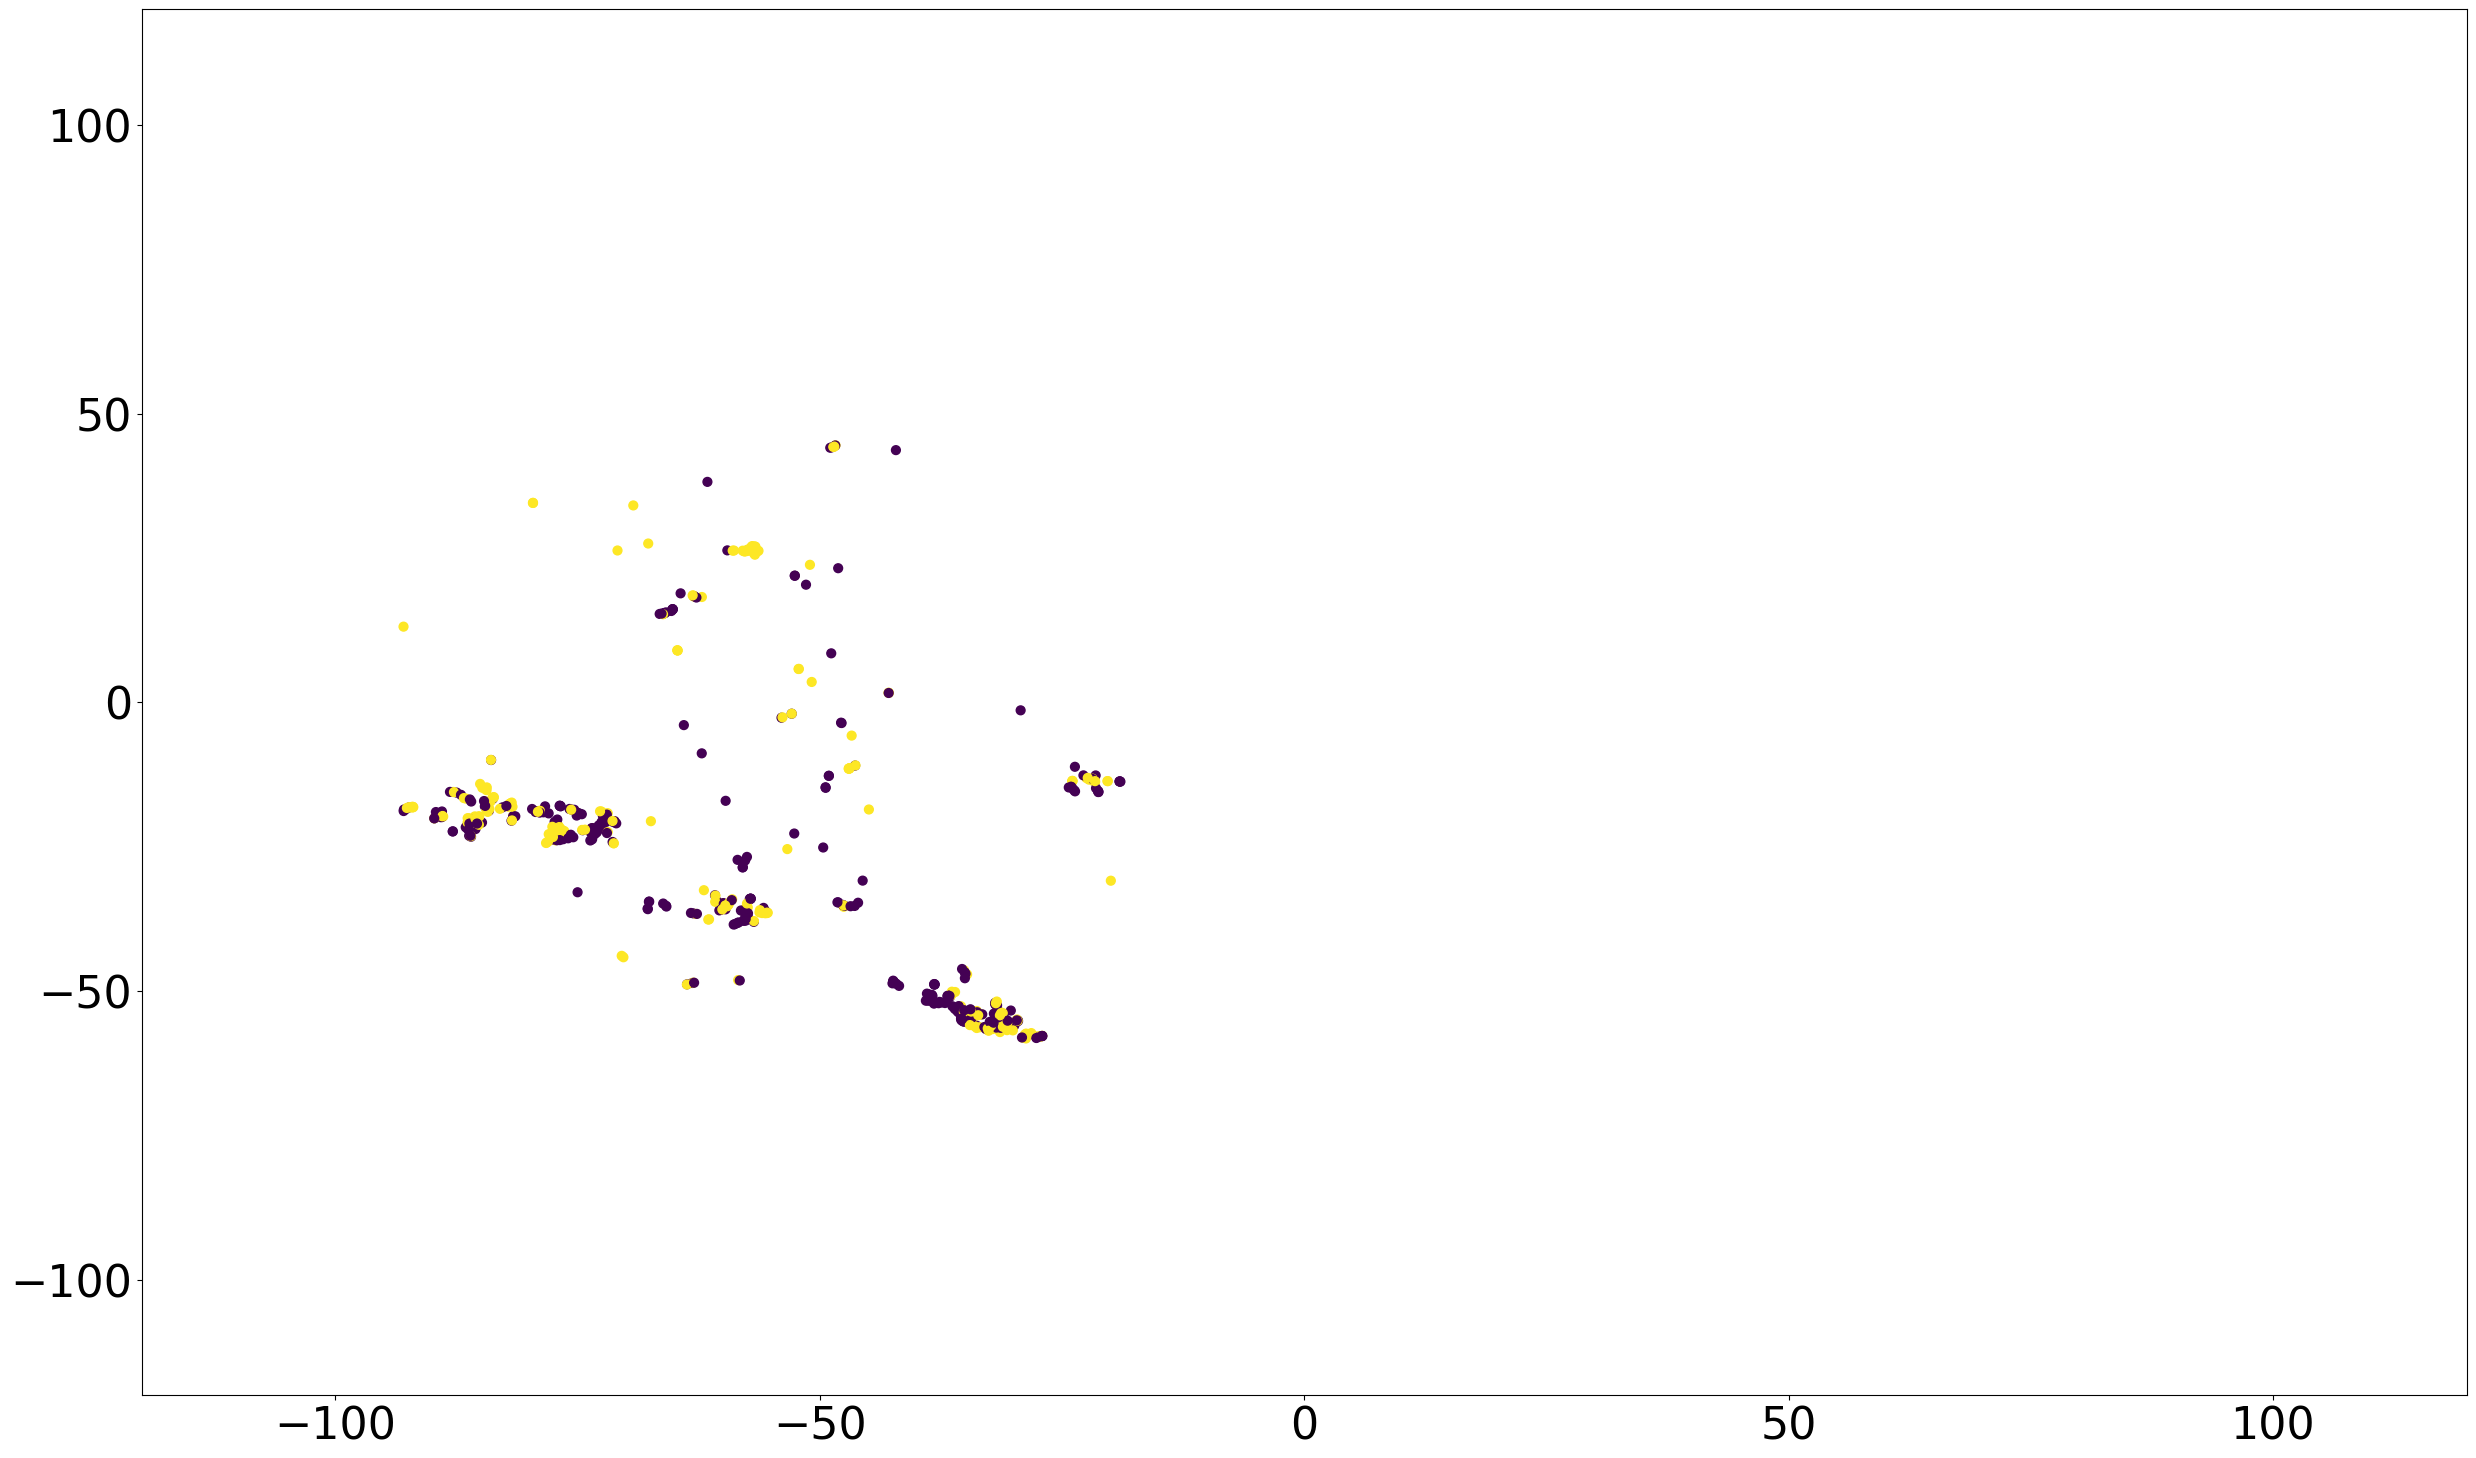

In [129]:
plt.scatter(X_embedded_global_clients[client_num][:, 0], X_embedded_global_clients[client_num][:, 1], c=labels_clients[client_num], s=40 )
plt.xlim(-120, 120)
plt.ylim(-120, 120)

In [130]:
"""
plt.scatter(X_embedded_global_clients[client_num][:, 0], X_embedded_global_clients[client_num][:, 1], c=labels_clients[client_num], )
plt.xlim(-110, 110)
plt.ylim(-100, 90)
plt.show()
"""

'\nplt.scatter(X_embedded_global_clients[client_num][:, 0], X_embedded_global_clients[client_num][:, 1], c=labels_clients[client_num], )\nplt.xlim(-110, 110)\nplt.ylim(-100, 90)\nplt.show()\n'

In [131]:
"""
plt.scatter(X_embedded_local_clients[client_num][:, 0], X_embedded_local_clients[client_num][:, 1], c=labels_clients[client_num], )
plt.xlim(-110, 110)
plt.ylim(-100, 90)
plt.show()
"""

'\nplt.scatter(X_embedded_local_clients[client_num][:, 0], X_embedded_local_clients[client_num][:, 1], c=labels_clients[client_num], )\nplt.xlim(-110, 110)\nplt.ylim(-100, 90)\nplt.show()\n'

In [132]:
"""
plt.scatter(X_embedded_local_global_clients[client_num][:, 0], X_embedded_local_global_clients[client_num][:, 1], c=labels_clients[client_num], )
plt.xlim(-110, 110)
plt.ylim(-100, 90)
plt.show()
"""

'\nplt.scatter(X_embedded_local_global_clients[client_num][:, 0], X_embedded_local_global_clients[client_num][:, 1], c=labels_clients[client_num], )\nplt.xlim(-110, 110)\nplt.ylim(-100, 90)\nplt.show()\n'

In [133]:
#import matplotlib.pyplot as plt
#fig = plt.figure(figsize=(30, 18))
#plt.rcParams["figure.figsize"] = (30,18)

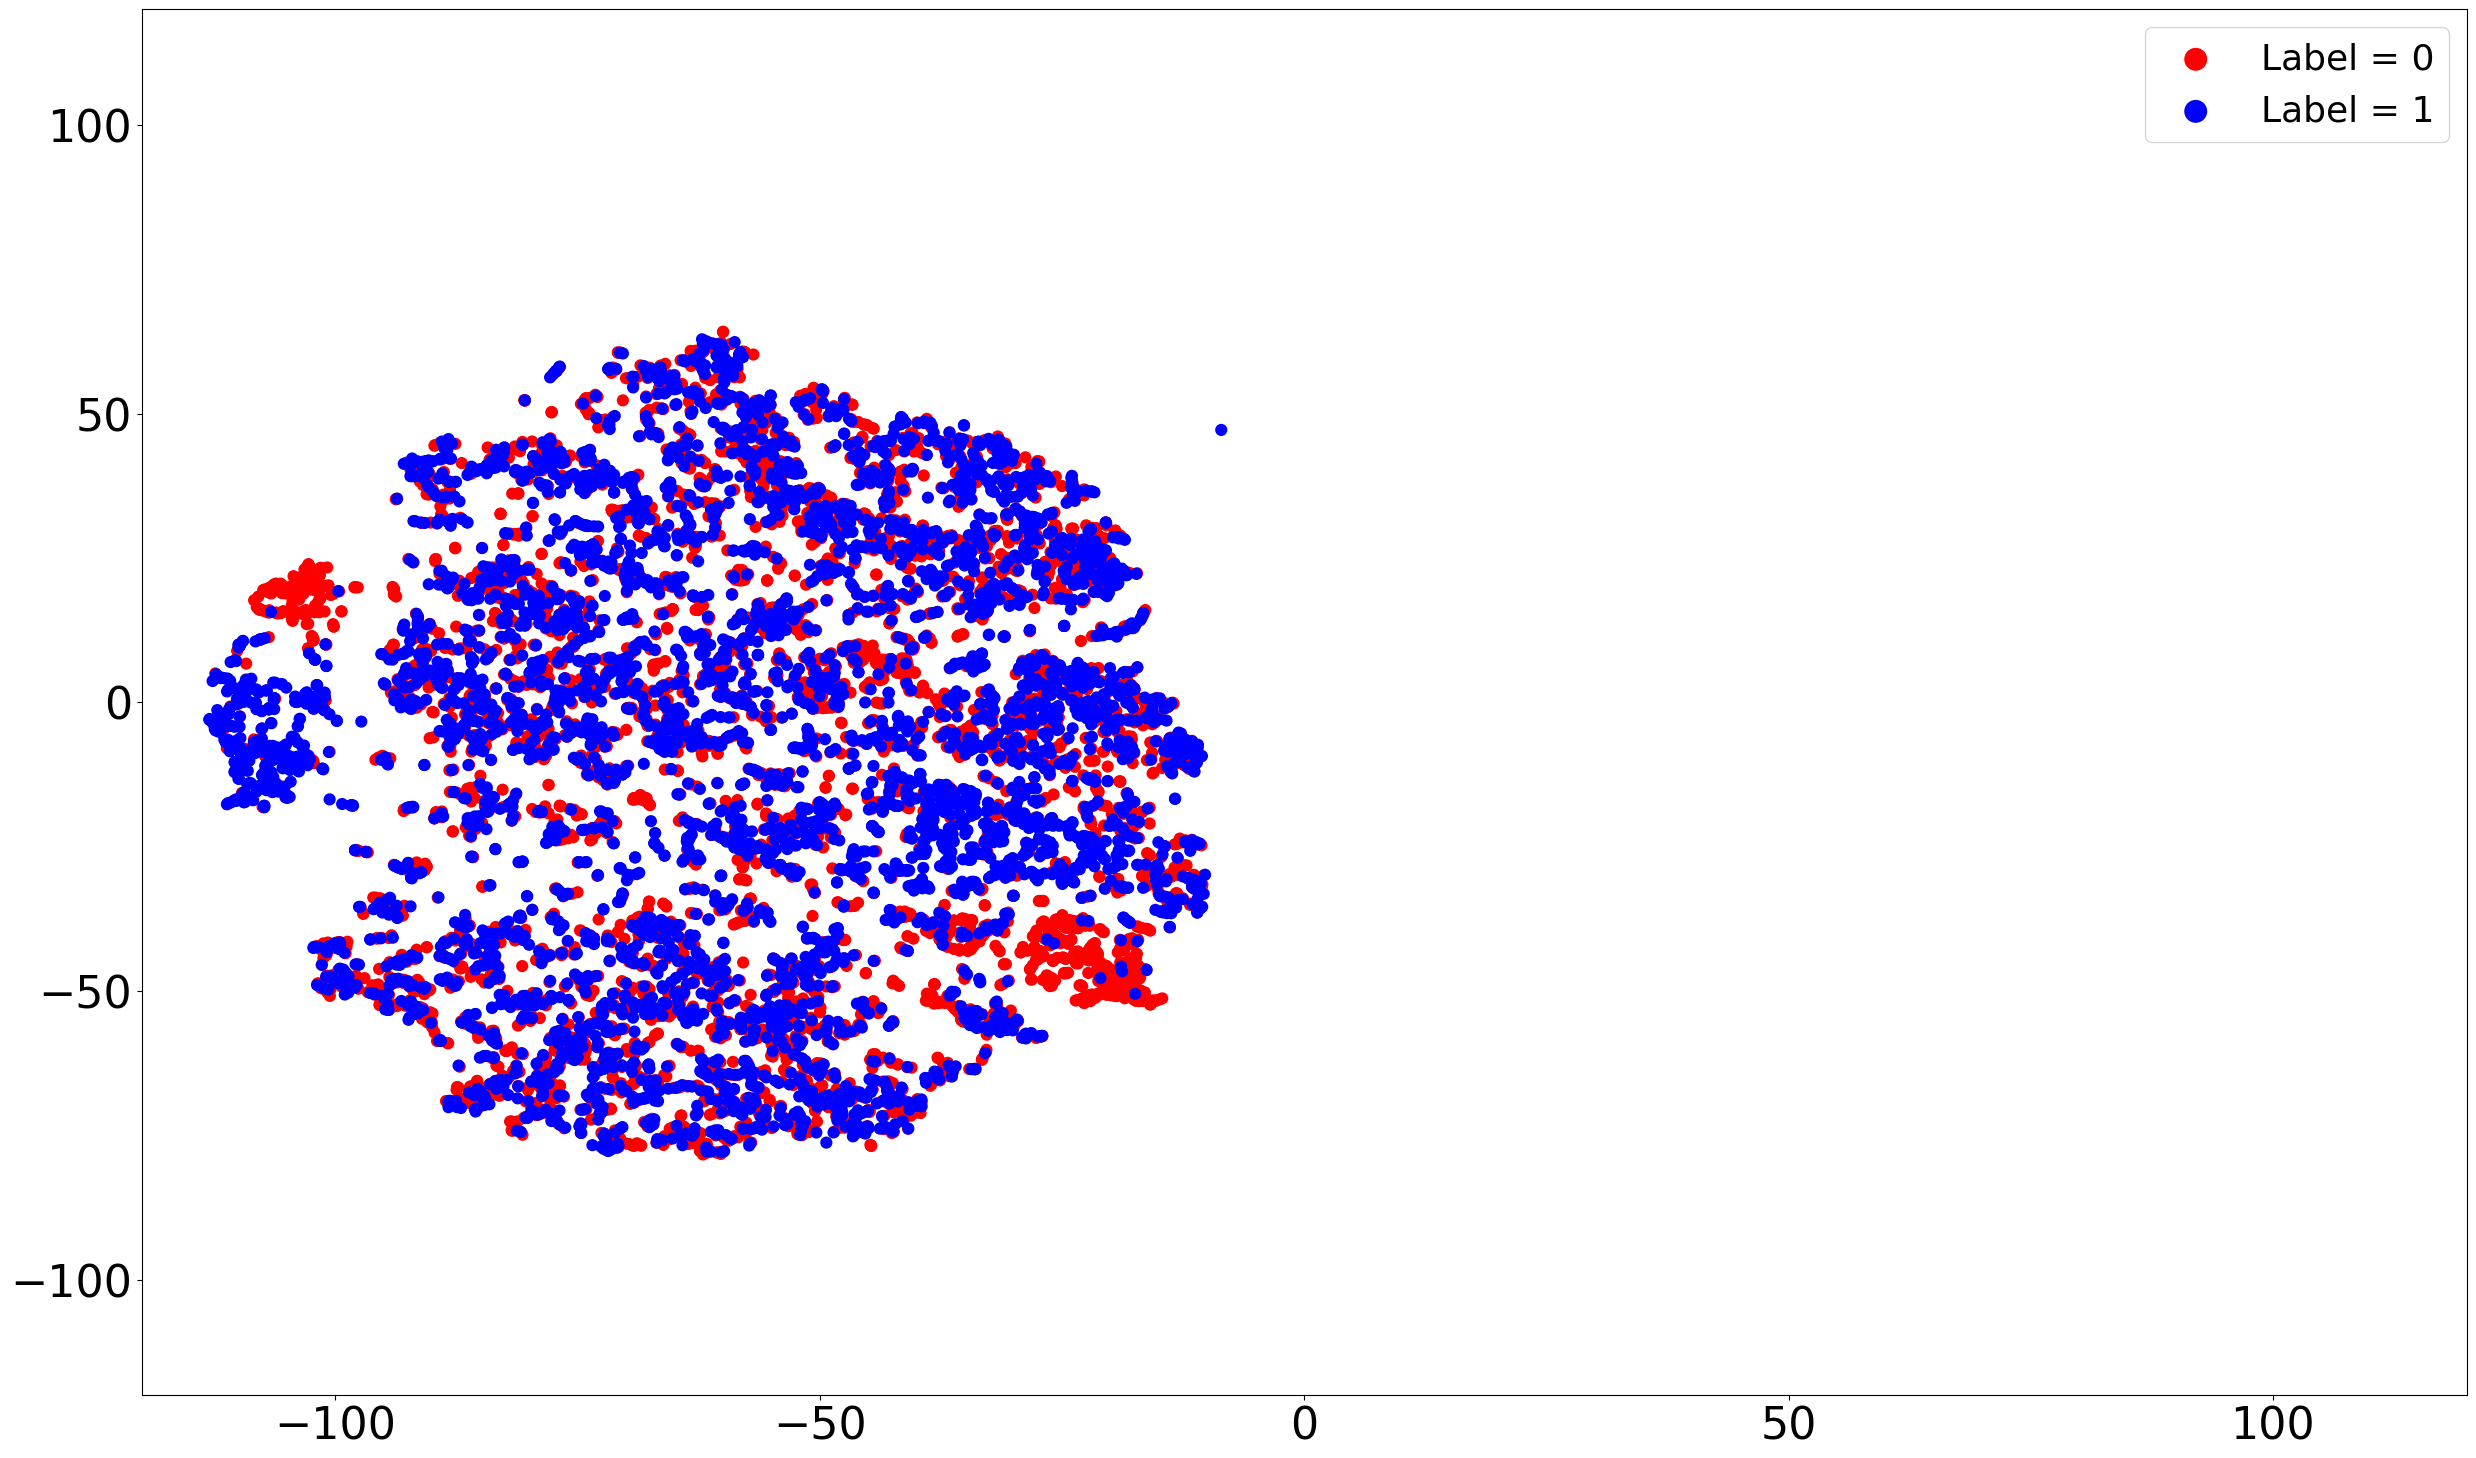

<Figure size 3000x1800 with 0 Axes>

In [134]:
colors=['red', 'blue']
for i in range(1+1):
    labels_use = labels_concat == i
    X_use = X_embedded_global[labels_use, :]
    plt.scatter(X_use[:, 0], X_use[:, 1], c=[colors[i]]*X_use.shape[0], label=f'Label = {i}', s=60)
plt.legend(prop={'size': 26}, markerscale=2)
plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'all_clients' + '_global')
plt.show()
plt.clf()

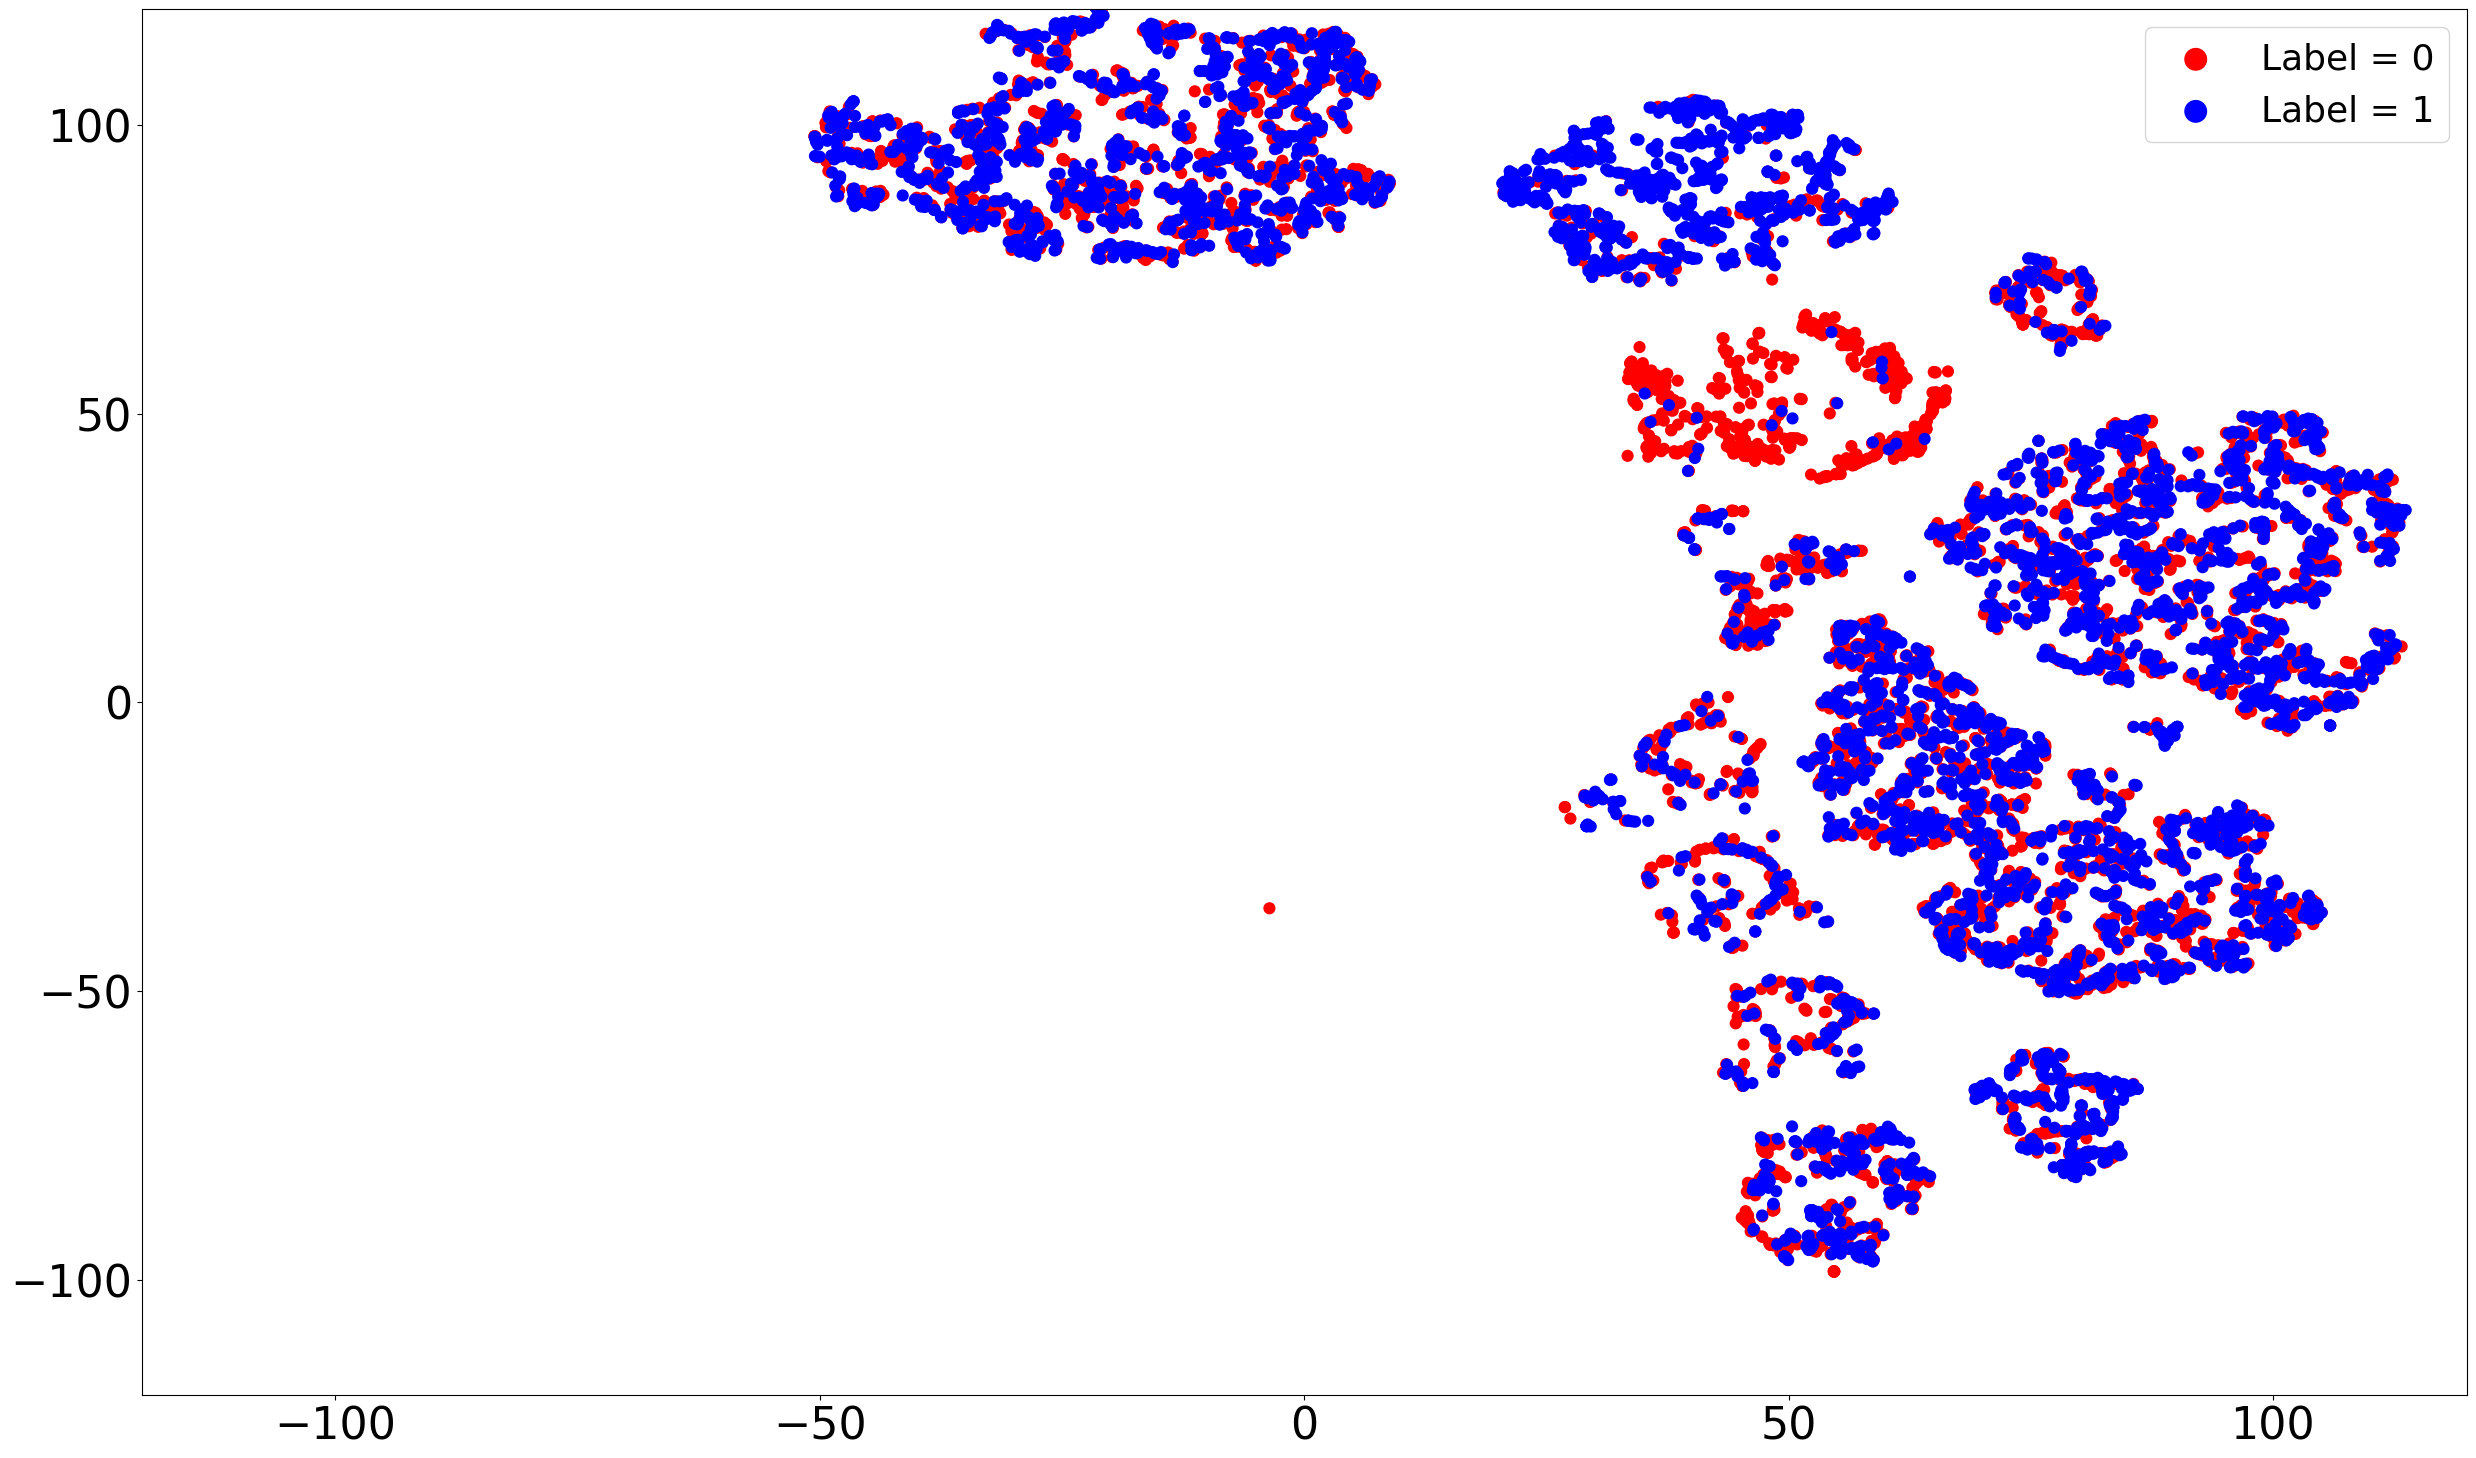

<Figure size 3000x1800 with 0 Axes>

In [135]:

colors=['red', 'blue']
for i in range(1+1):
    labels_use = labels_concat == i
    X_use = X_embedded_local[labels_use, :]
    plt.scatter(X_use[:, 0], X_use[:, 1], c=[colors[i]]*X_use.shape[0], label=f'Label = {i}', s=60)
plt.legend(prop={'size': 26}, markerscale=2)
plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'all_clients' + '_local')
plt.show()
plt.clf()

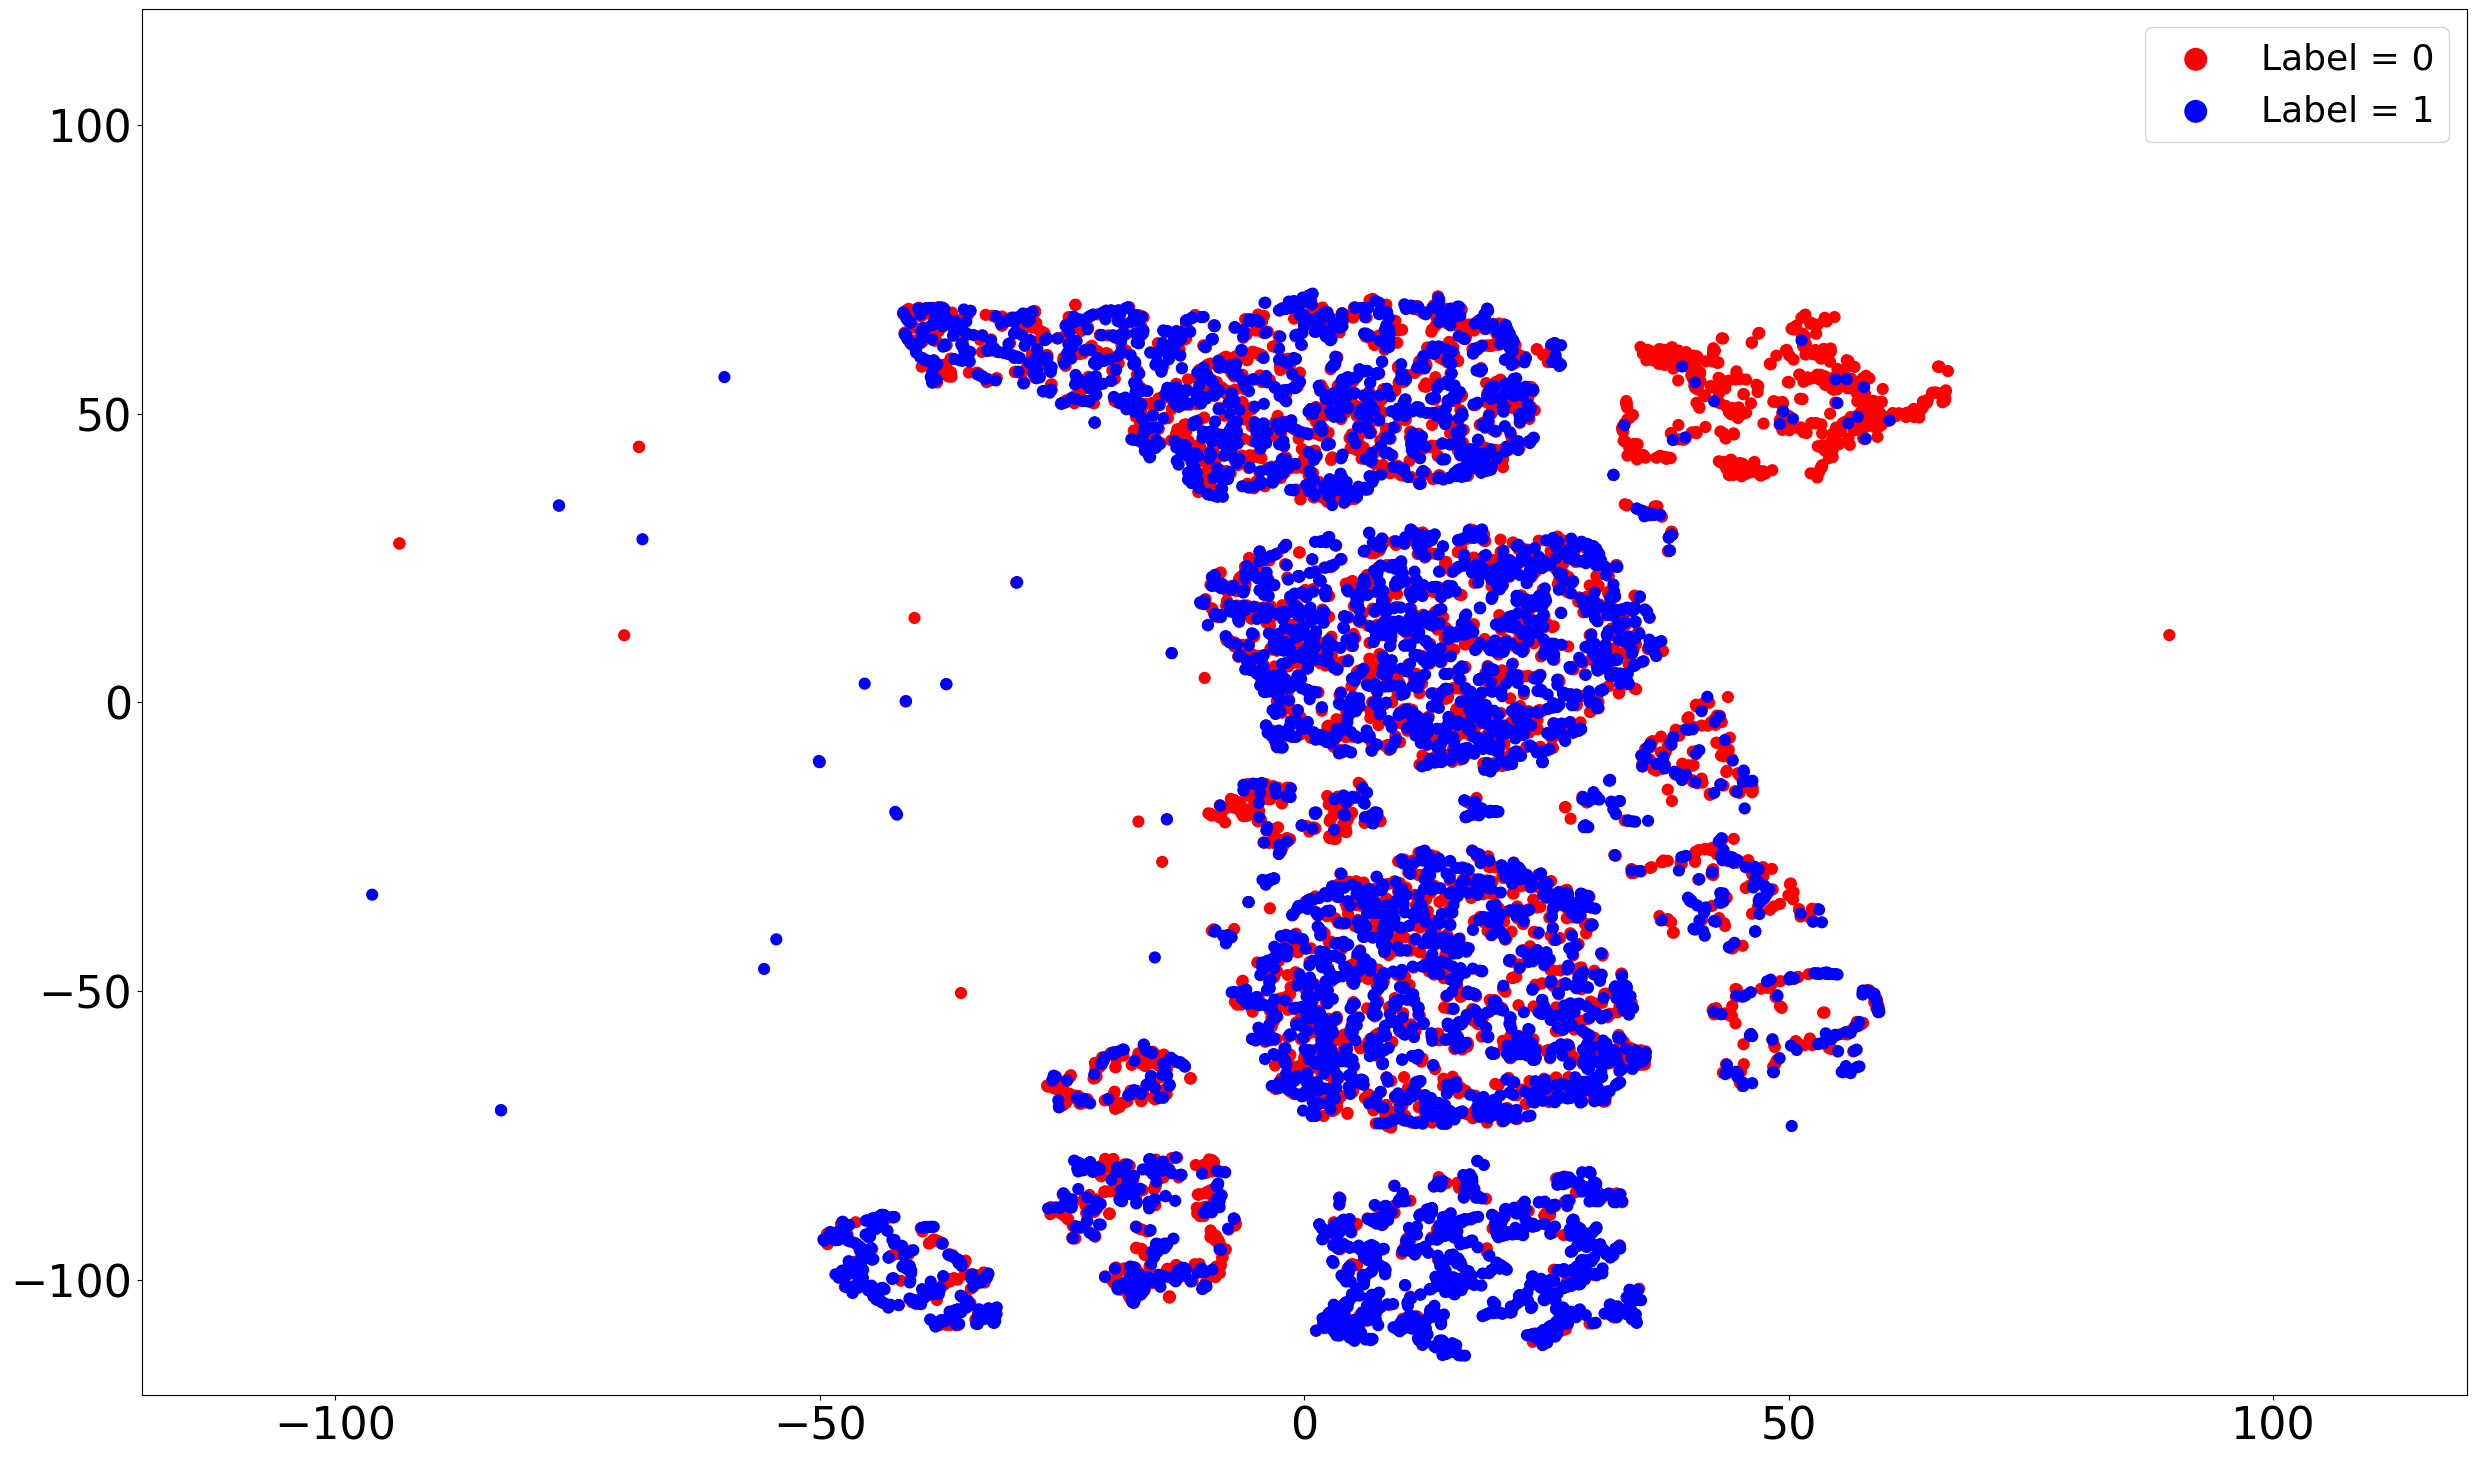

<Figure size 3000x1800 with 0 Axes>

In [136]:
colors=['red', 'blue']
for i in range(1+1):
    labels_use = labels_concat == i
    X_use = X_embedded_local_global[labels_use, :]
    plt.scatter(X_use[:, 0], X_use[:, 1], c=[colors[i]]*X_use.shape[0], label=f'Label = {i}', s=60)
plt.legend(prop={'size': 26}, markerscale=2)
plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'all_clients' + '_local_global')
plt.show()
plt.clf()

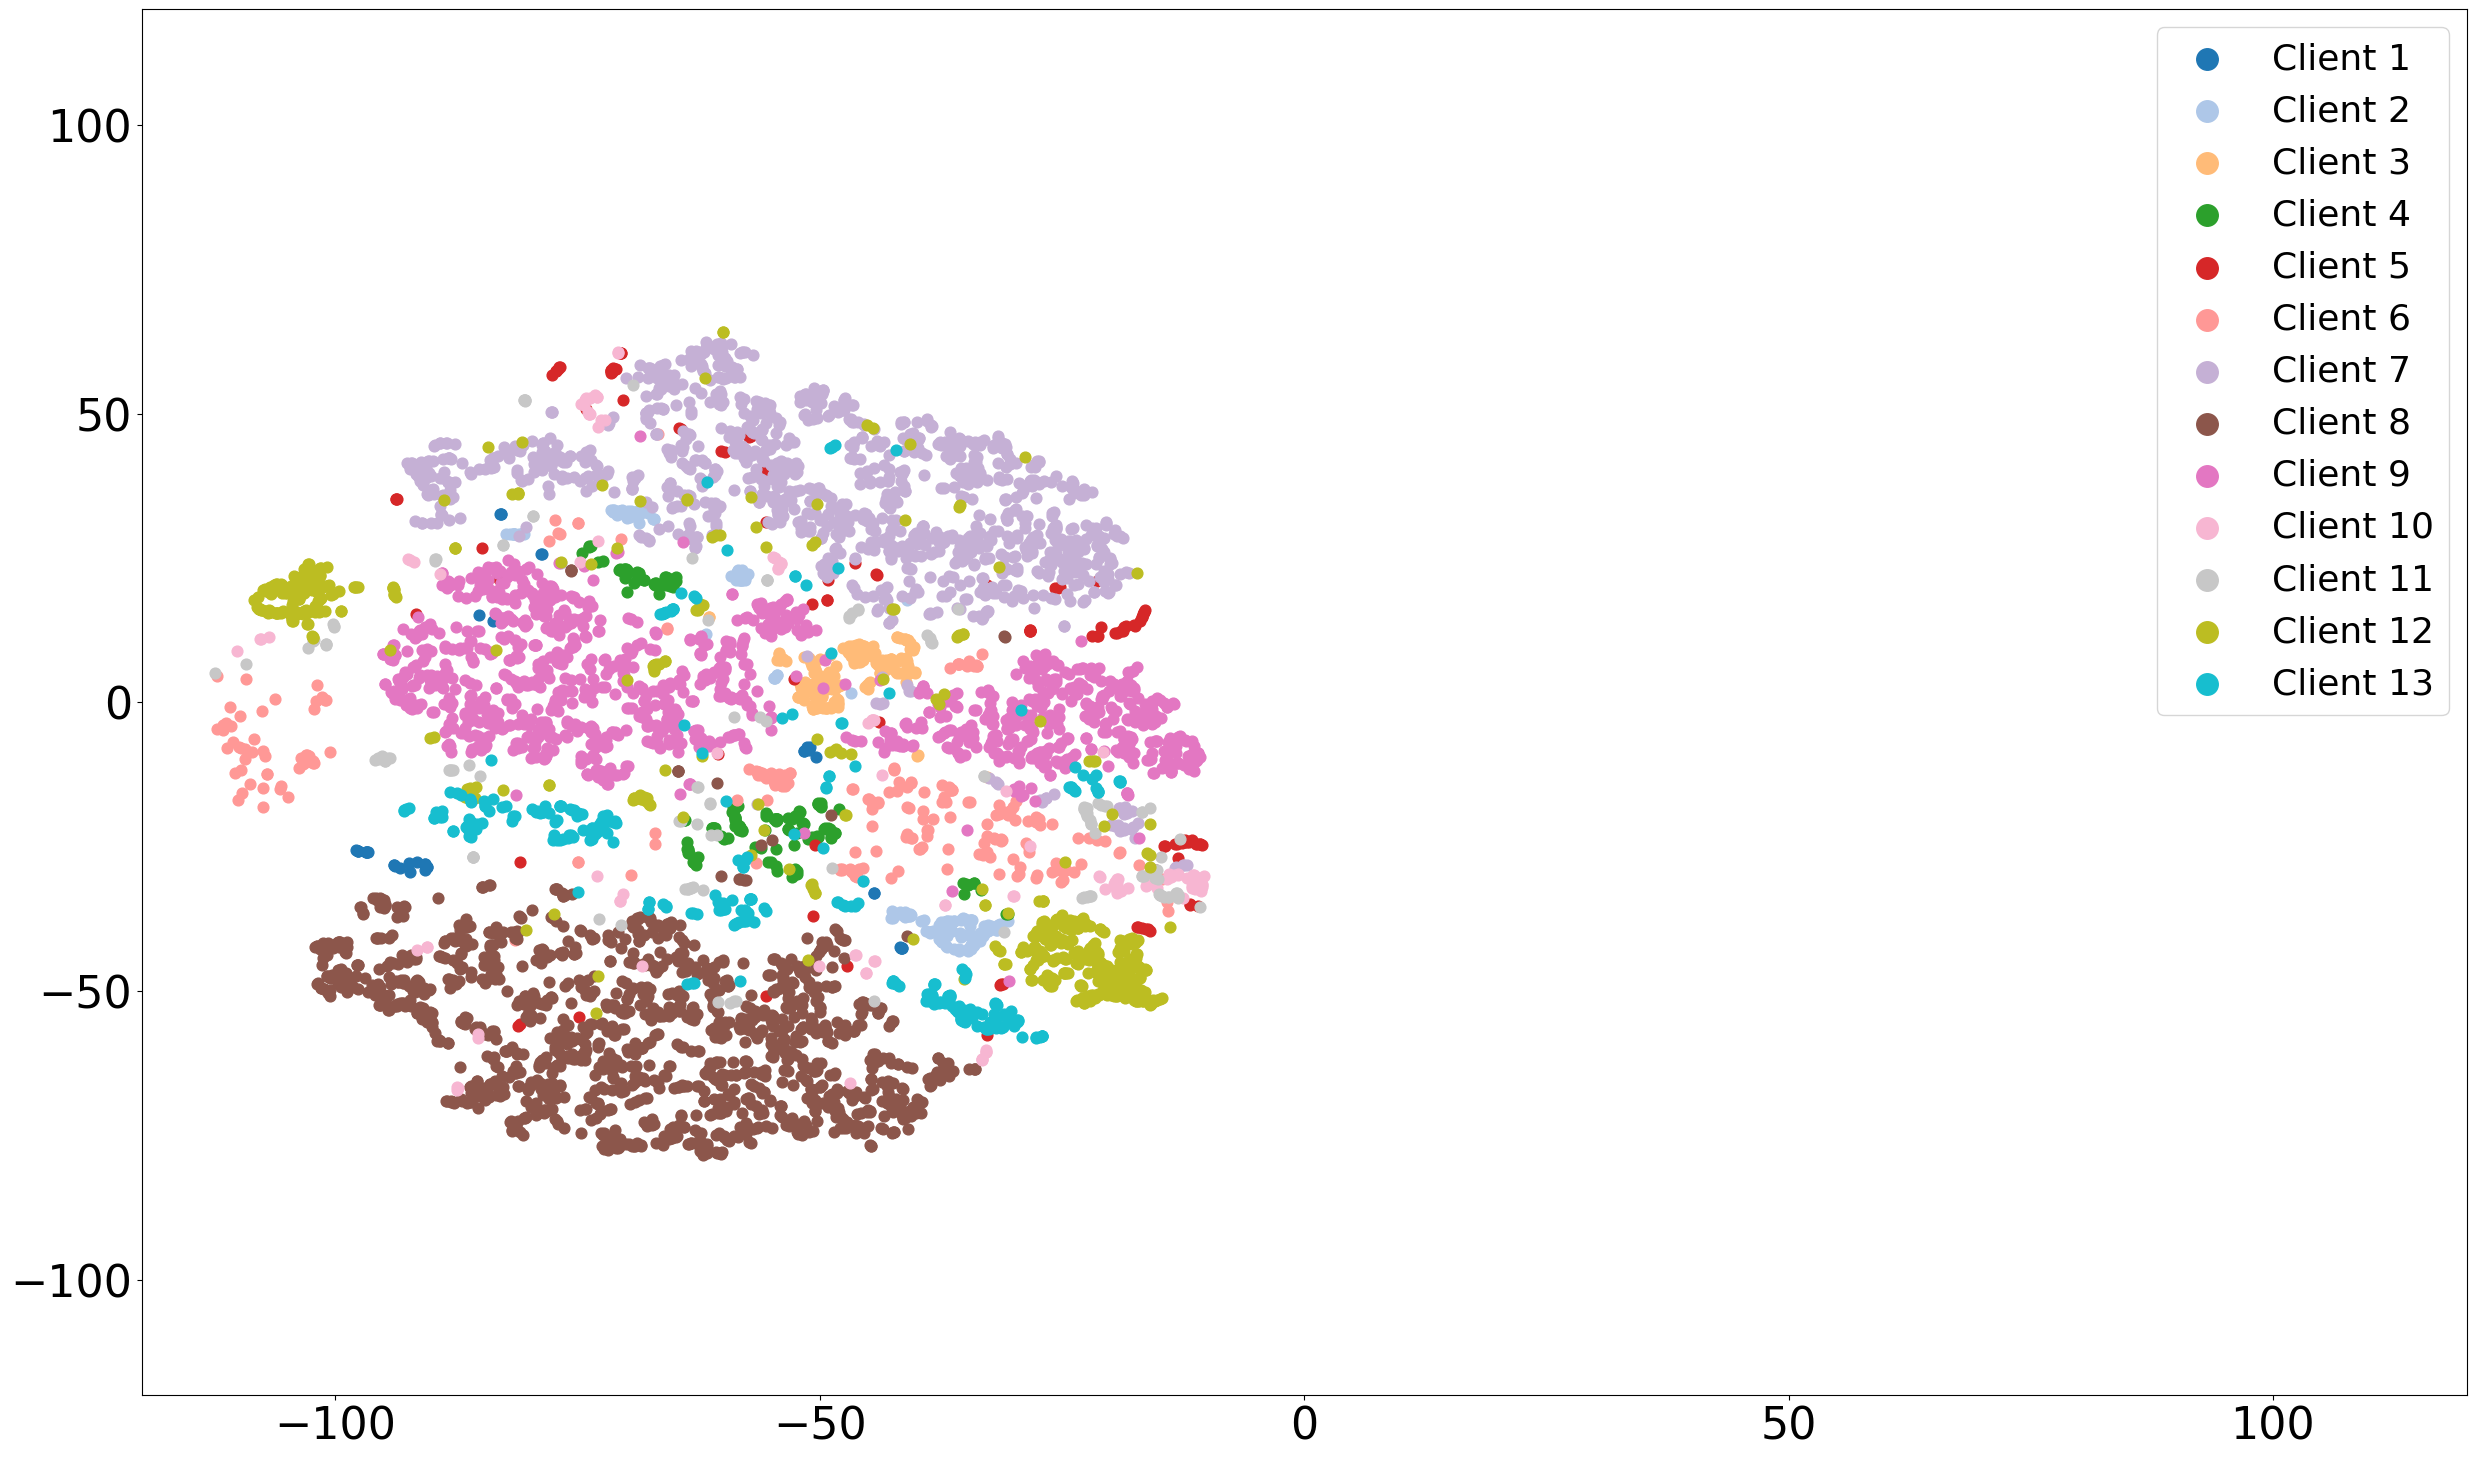

In [137]:

colors = []
NUM_COLORS = 13
cm = plt.get_cmap('tab20')
colors_use = list(map(cm, colors))
fig = plt.figure()
for client in range(1, client_num+1):
    data_size = X_embedded_global_clients[client].shape[0]
    colors_curr = data_size*[client]
    colors += colors_curr

ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for client in range(1, client_num+1):
    labels_0 = labels_clients[client] == 0
    X_embedded_global_clients_only_label_0 = X_embedded_global_clients[client][labels_0, :]
    ax.scatter(X_embedded_global_clients_only_label_0[:,0], X_embedded_global_clients_only_label_0[:,1], label = f'Client {client}', s=60)



#ax.legend_elements()
ax.legend(prop={'size': 26}, markerscale=2)

plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'global_comparison_label_0')

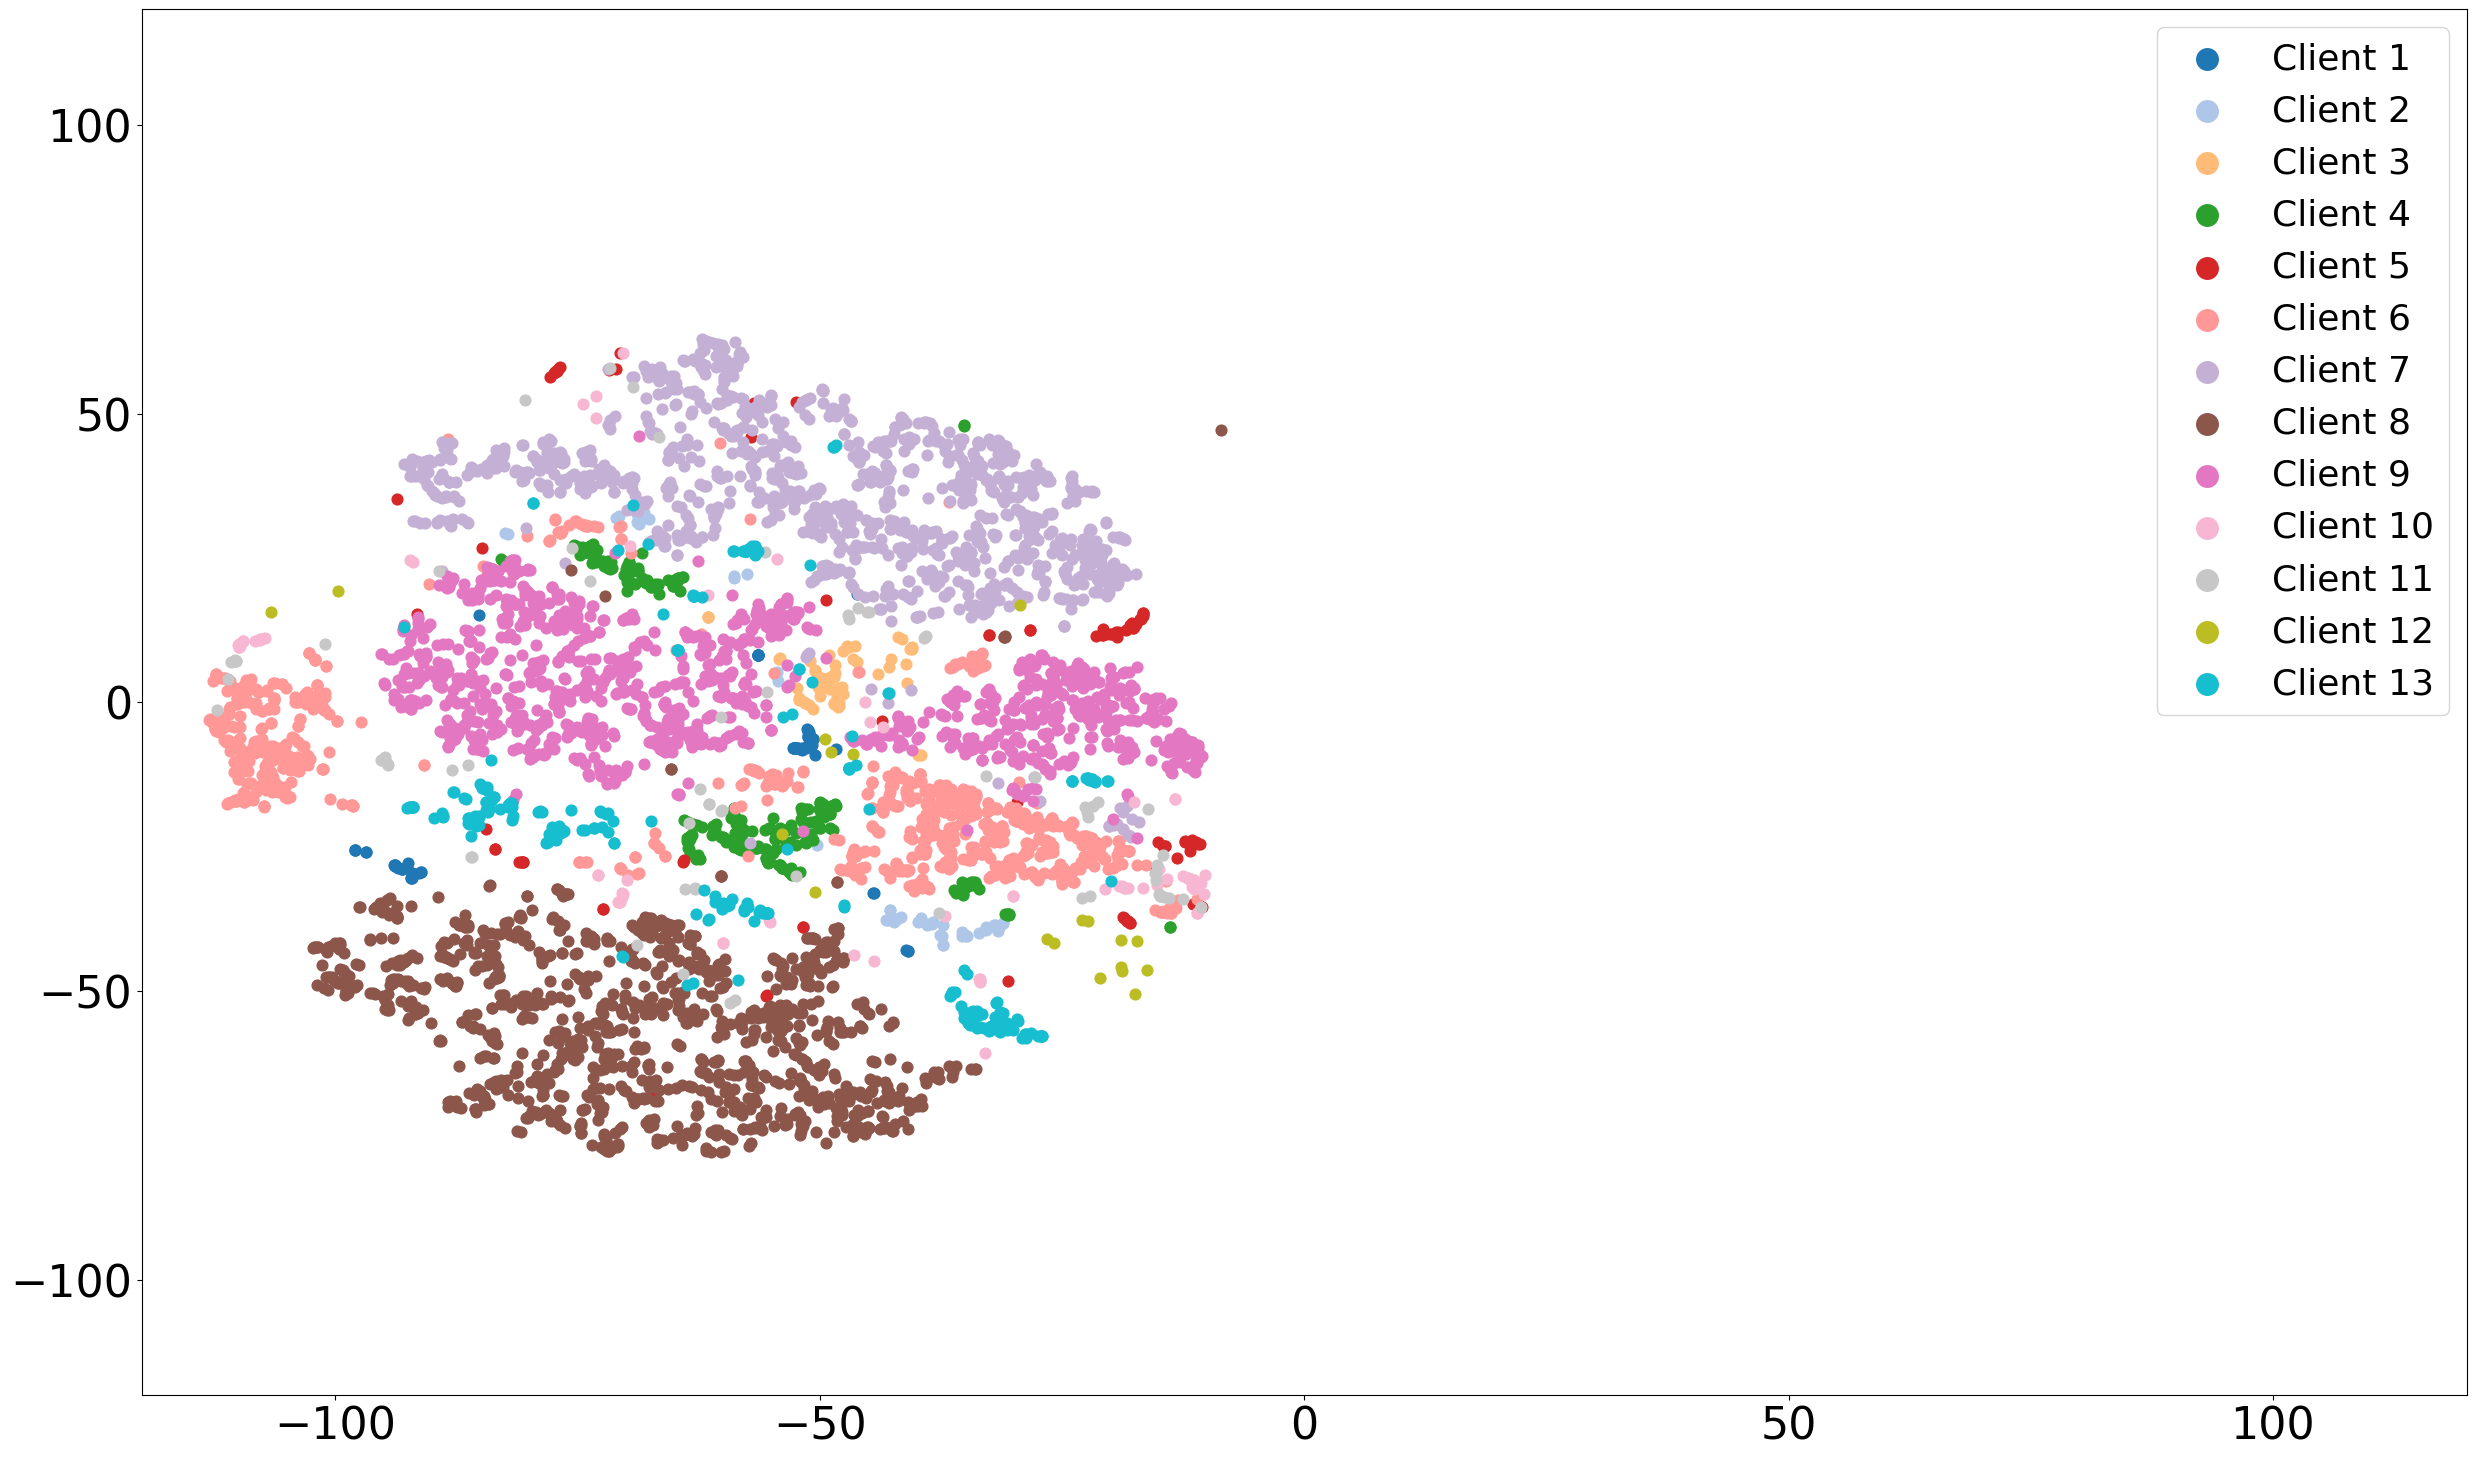

In [138]:

colors = []
NUM_COLORS = 13
cm = plt.get_cmap('tab20')
colors_use = list(map(cm, colors))
fig = plt.figure()
for client in range(1, client_num+1):
    data_size = X_embedded_global_clients[client].shape[0]
    colors_curr = data_size*[client]
    colors += colors_curr

ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for client in range(1, client_num+1):
    labels_1 = labels_clients[client] == 1
    X_embedded_global_clients_only_label_1 = X_embedded_global_clients[client][labels_1, :]
    ax.scatter(X_embedded_global_clients_only_label_1[:,0], X_embedded_global_clients_only_label_1[:,1], label = f'Client {client}', s=60)



#ax.legend_elements()
ax.legend(prop={'size': 26}, markerscale=2)

plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'global_comparison_label_1')

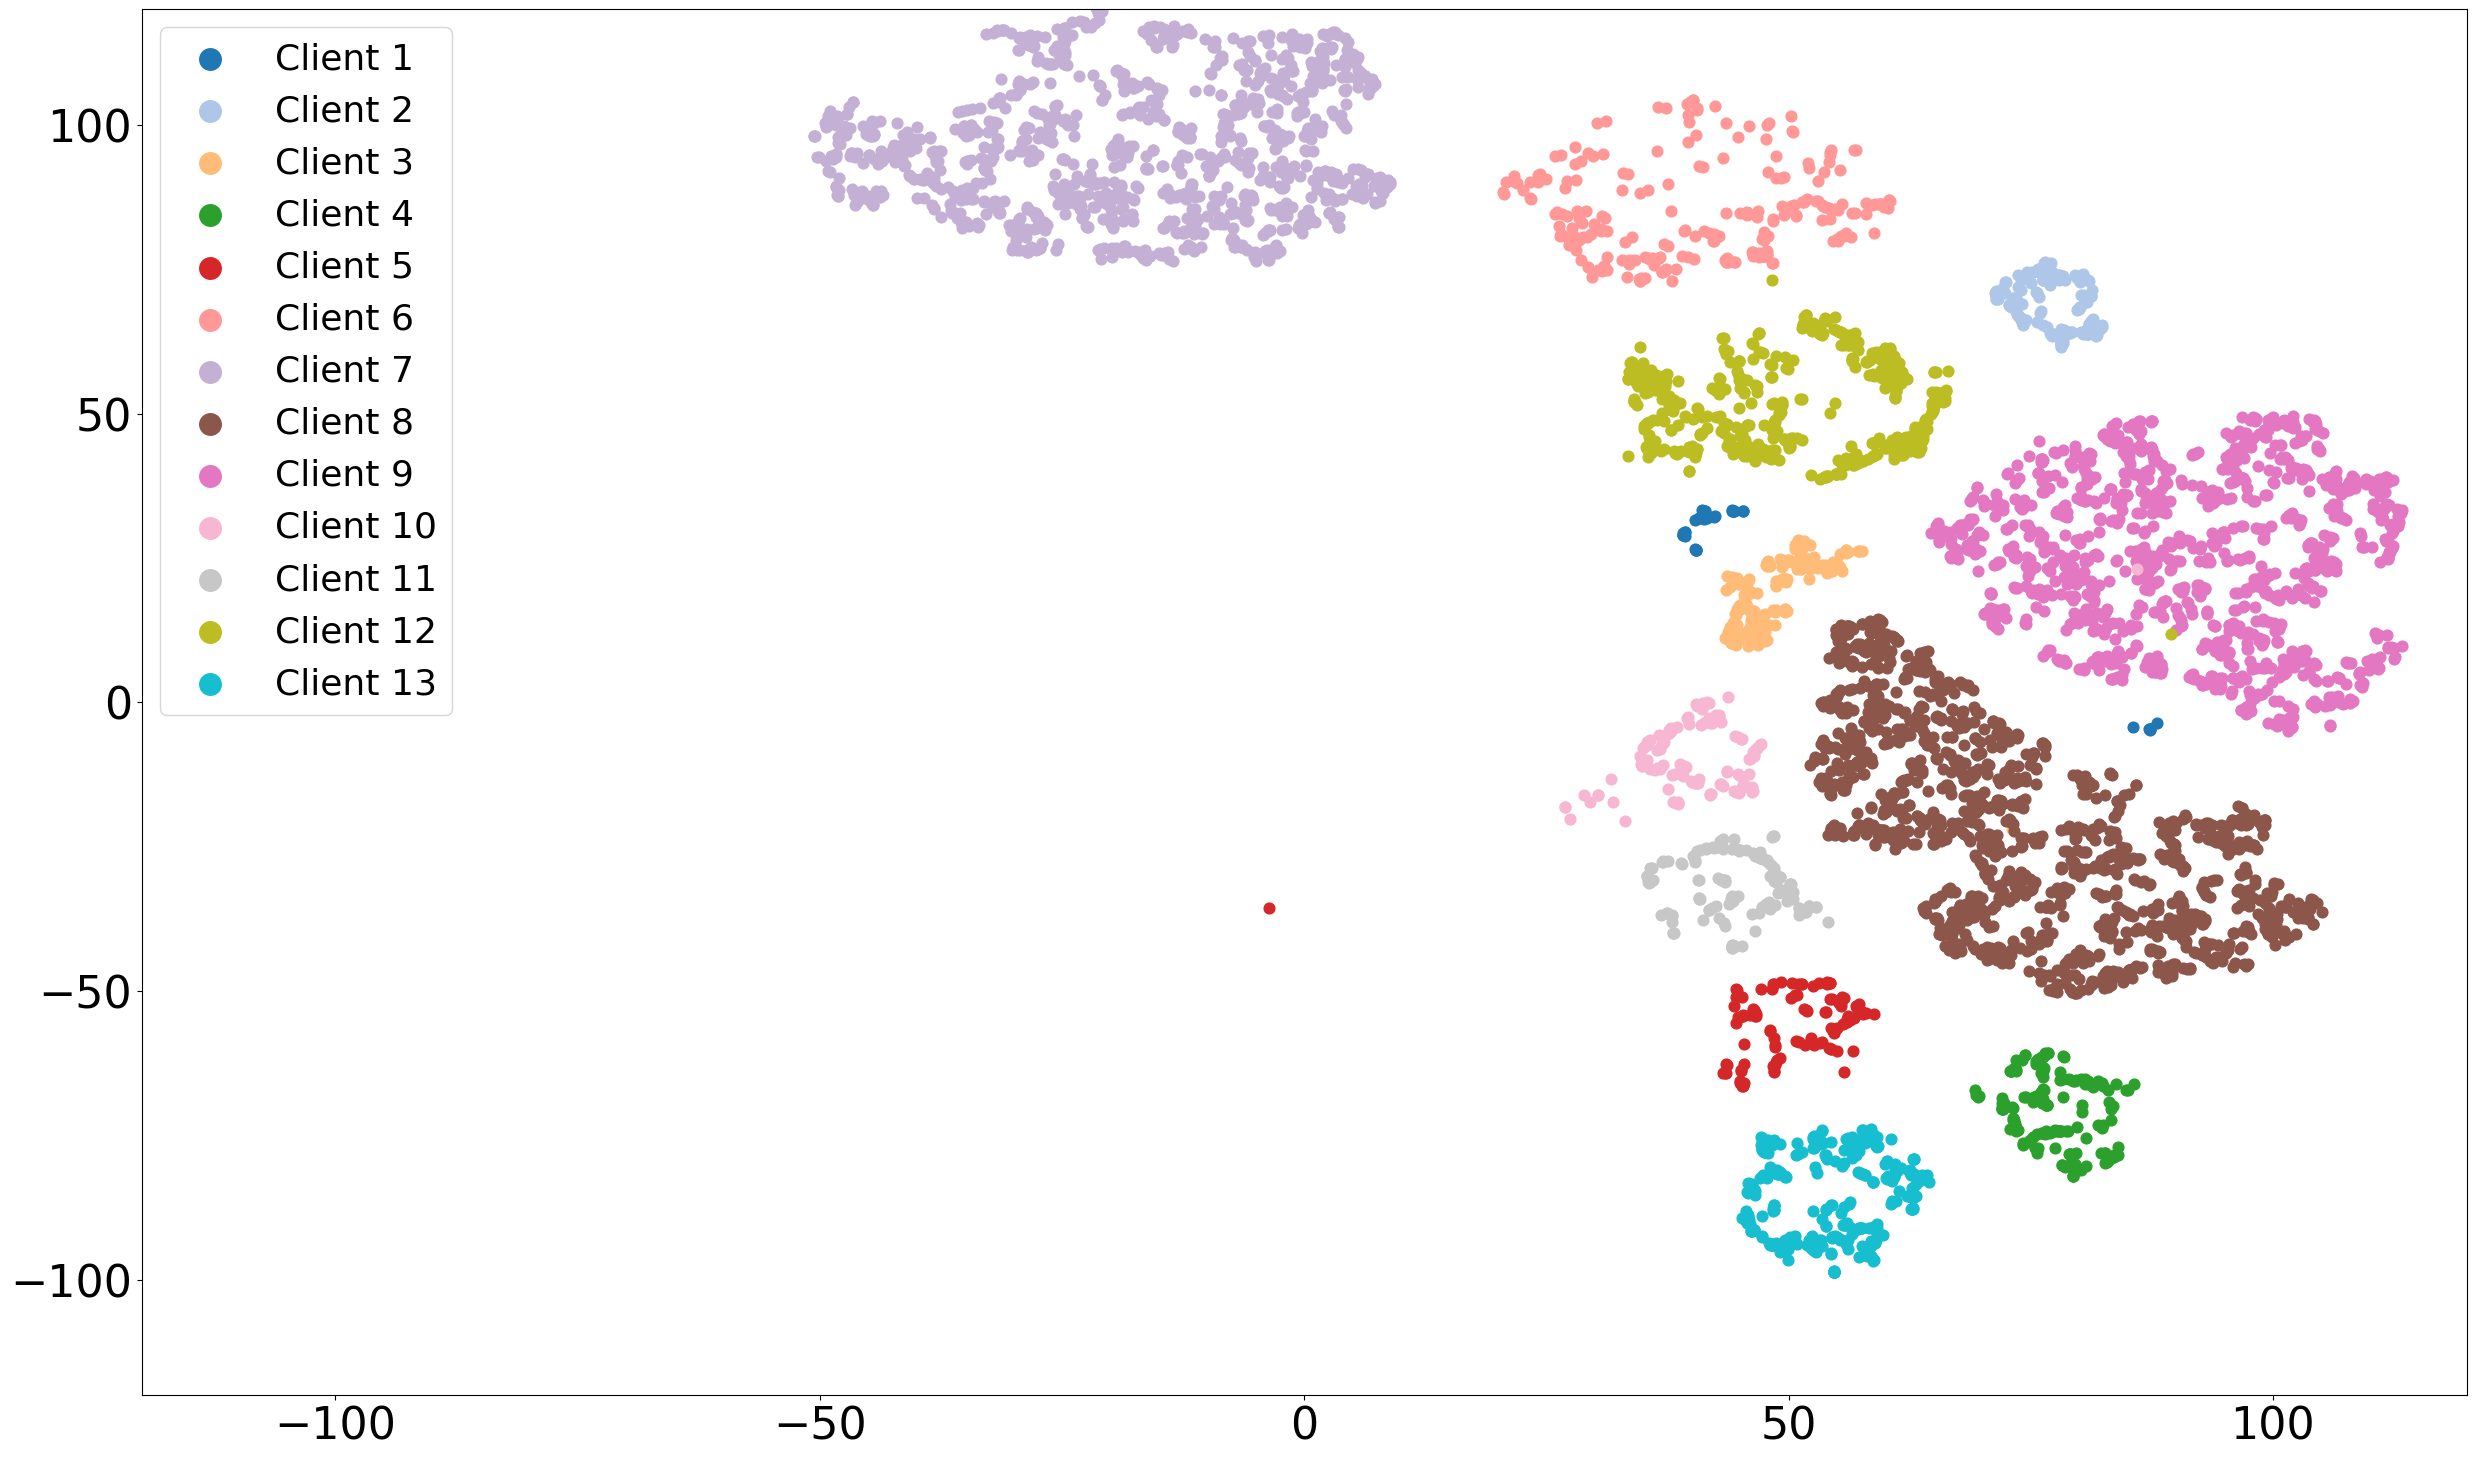

In [139]:

colors = []
NUM_COLORS = 13
cm = plt.get_cmap('tab20')
colors_use = list(map(cm, colors))
fig = plt.figure()
for client in range(1, client_num+1):
    data_size = X_embedded_local_clients[client].shape[0]
    colors_curr = data_size*[client]
    colors += colors_curr

ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for client in range(1, client_num+1):
    labels_0 = labels_clients[client] == 0
    X_embedded_local_clients_only_label_0 = X_embedded_local_clients[client][labels_0, :]
    ax.scatter(X_embedded_local_clients_only_label_0[:,0], X_embedded_local_clients_only_label_0[:,1], label = f'Client {client}', s=60)



#ax.legend_elements()
ax.legend(prop={'size': 26}, markerscale=2)

plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'local_comparison_label_0')

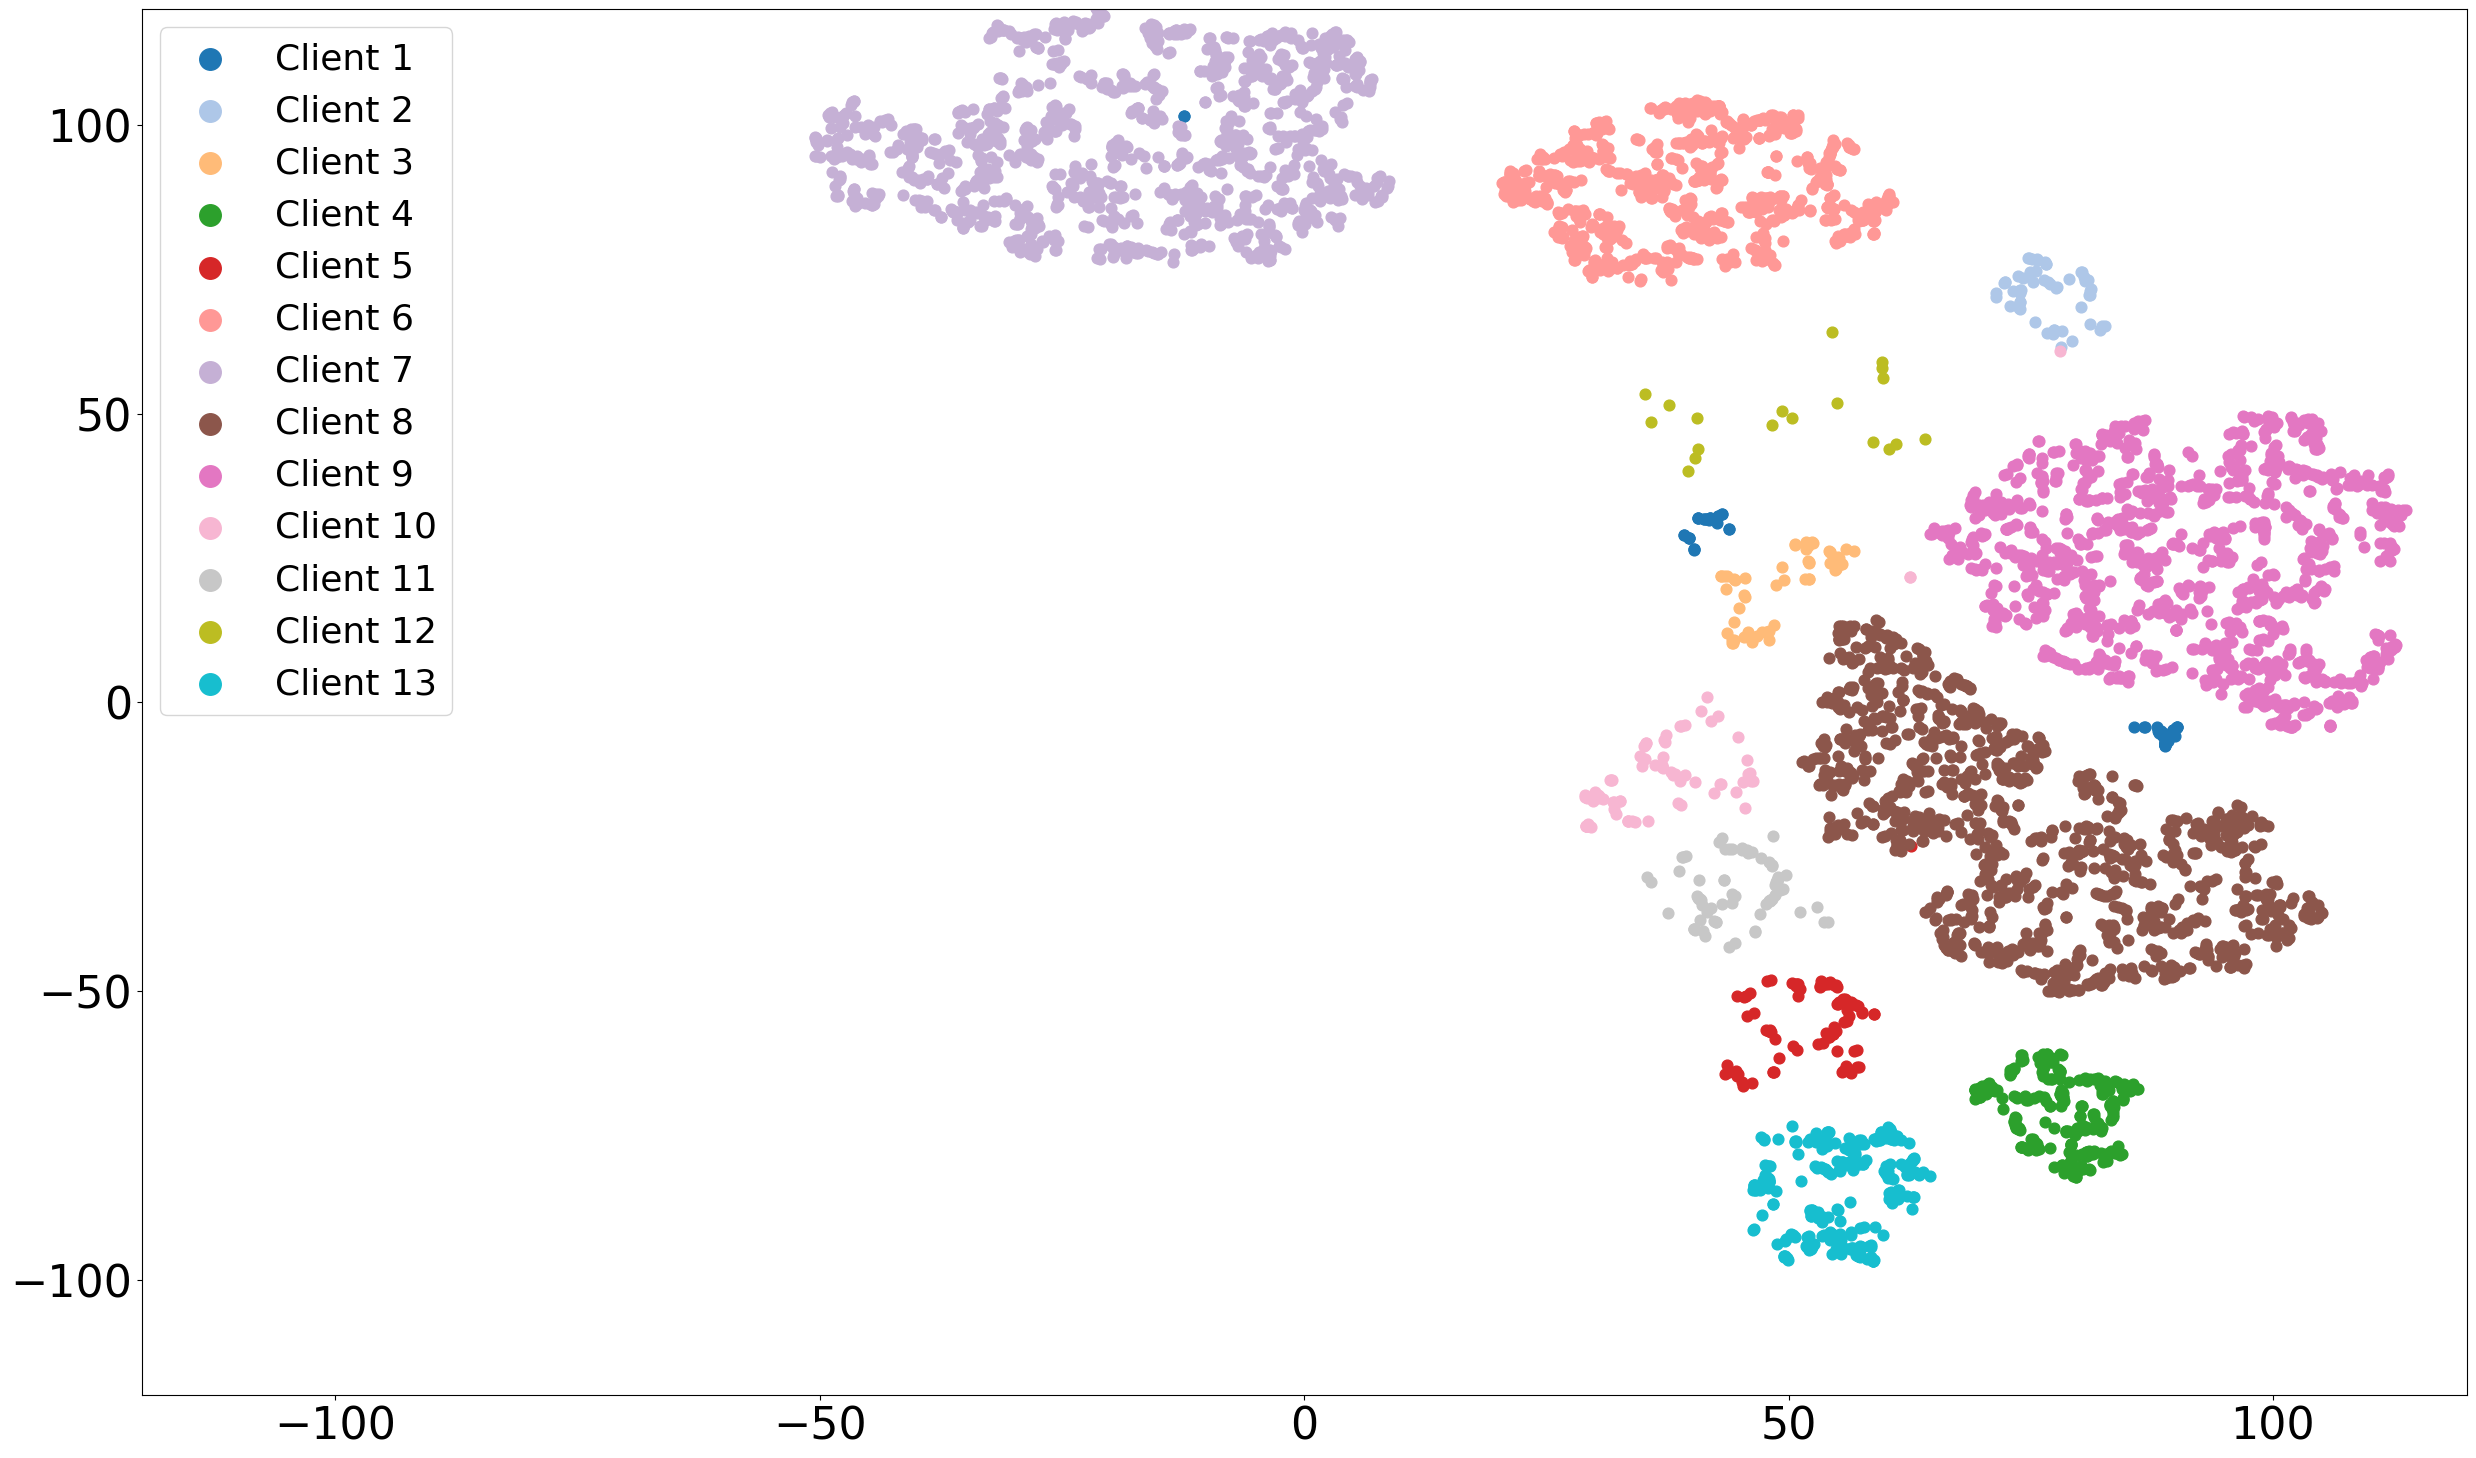

In [140]:

colors = []
NUM_COLORS = 13
cm = plt.get_cmap('tab20')
colors_use = list(map(cm, colors))
fig = plt.figure()
for client in range(1, client_num+1):
    data_size = X_embedded_local_clients[client].shape[0]
    colors_curr = data_size*[client]
    colors += colors_curr

ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for client in range(1, client_num+1):
    labels_0 = labels_clients[client] == 1
    X_embedded_local_clients_only_label_0 = X_embedded_local_clients[client][labels_0, :]
    ax.scatter(X_embedded_local_clients_only_label_0[:,0], X_embedded_local_clients_only_label_0[:,1], label = f'Client {client}', s=60)



#ax.legend_elements()
ax.legend(prop={'size': 26}, markerscale=2)
plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'local_comparison_label_1')

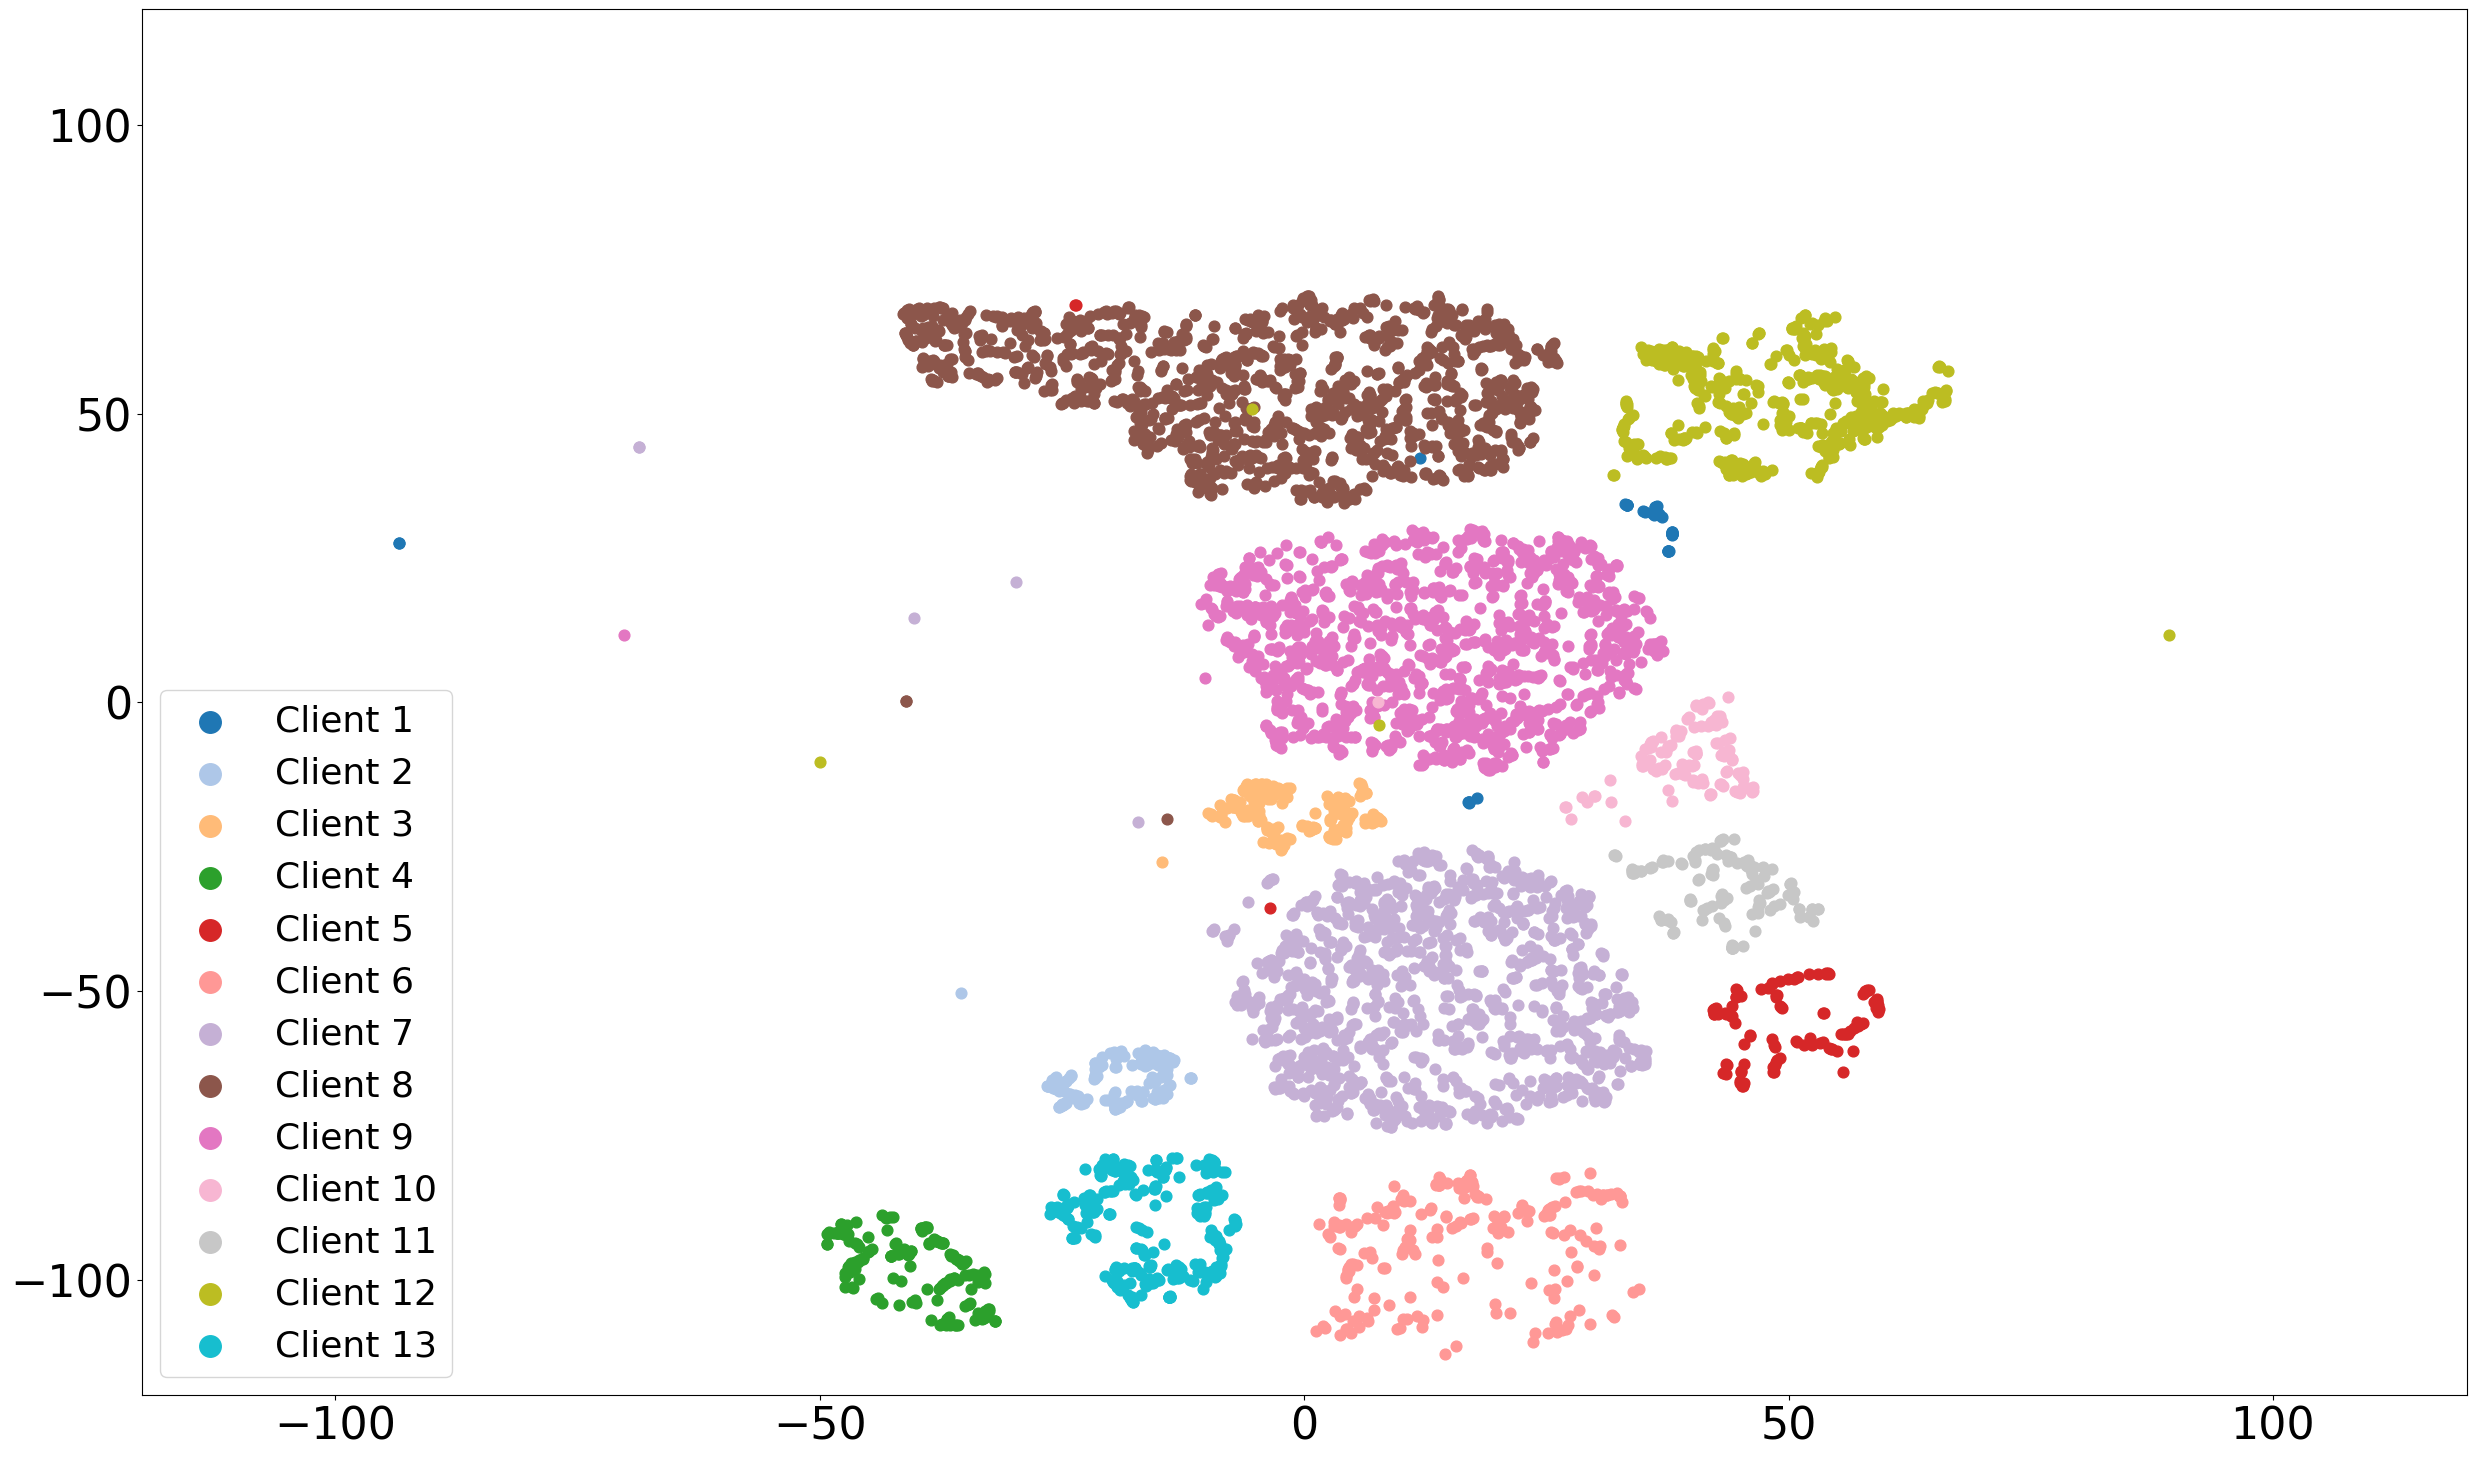

In [141]:

colors = []
NUM_COLORS = 13
cm = plt.get_cmap('tab20')
colors_use = list(map(cm, colors))
fig = plt.figure()
for client in range(1, client_num+1):
    data_size = X_embedded_local_global_clients[client].shape[0]
    colors_curr = data_size*[client]
    colors += colors_curr

ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for client in range(1, client_num+1):
    labels_0 = labels_clients[client] == 0
    X_embedded_local_global_clients_only_label_0 = X_embedded_local_global_clients[client][labels_0, :]
    ax.scatter(X_embedded_local_global_clients_only_label_0[:,0], X_embedded_local_global_clients_only_label_0[:,1], label = f'Client {client}', s=60)



#ax.legend_elements()
ax.legend(prop={'size': 26}, markerscale=2)

plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'local_global_comparison_label_0')

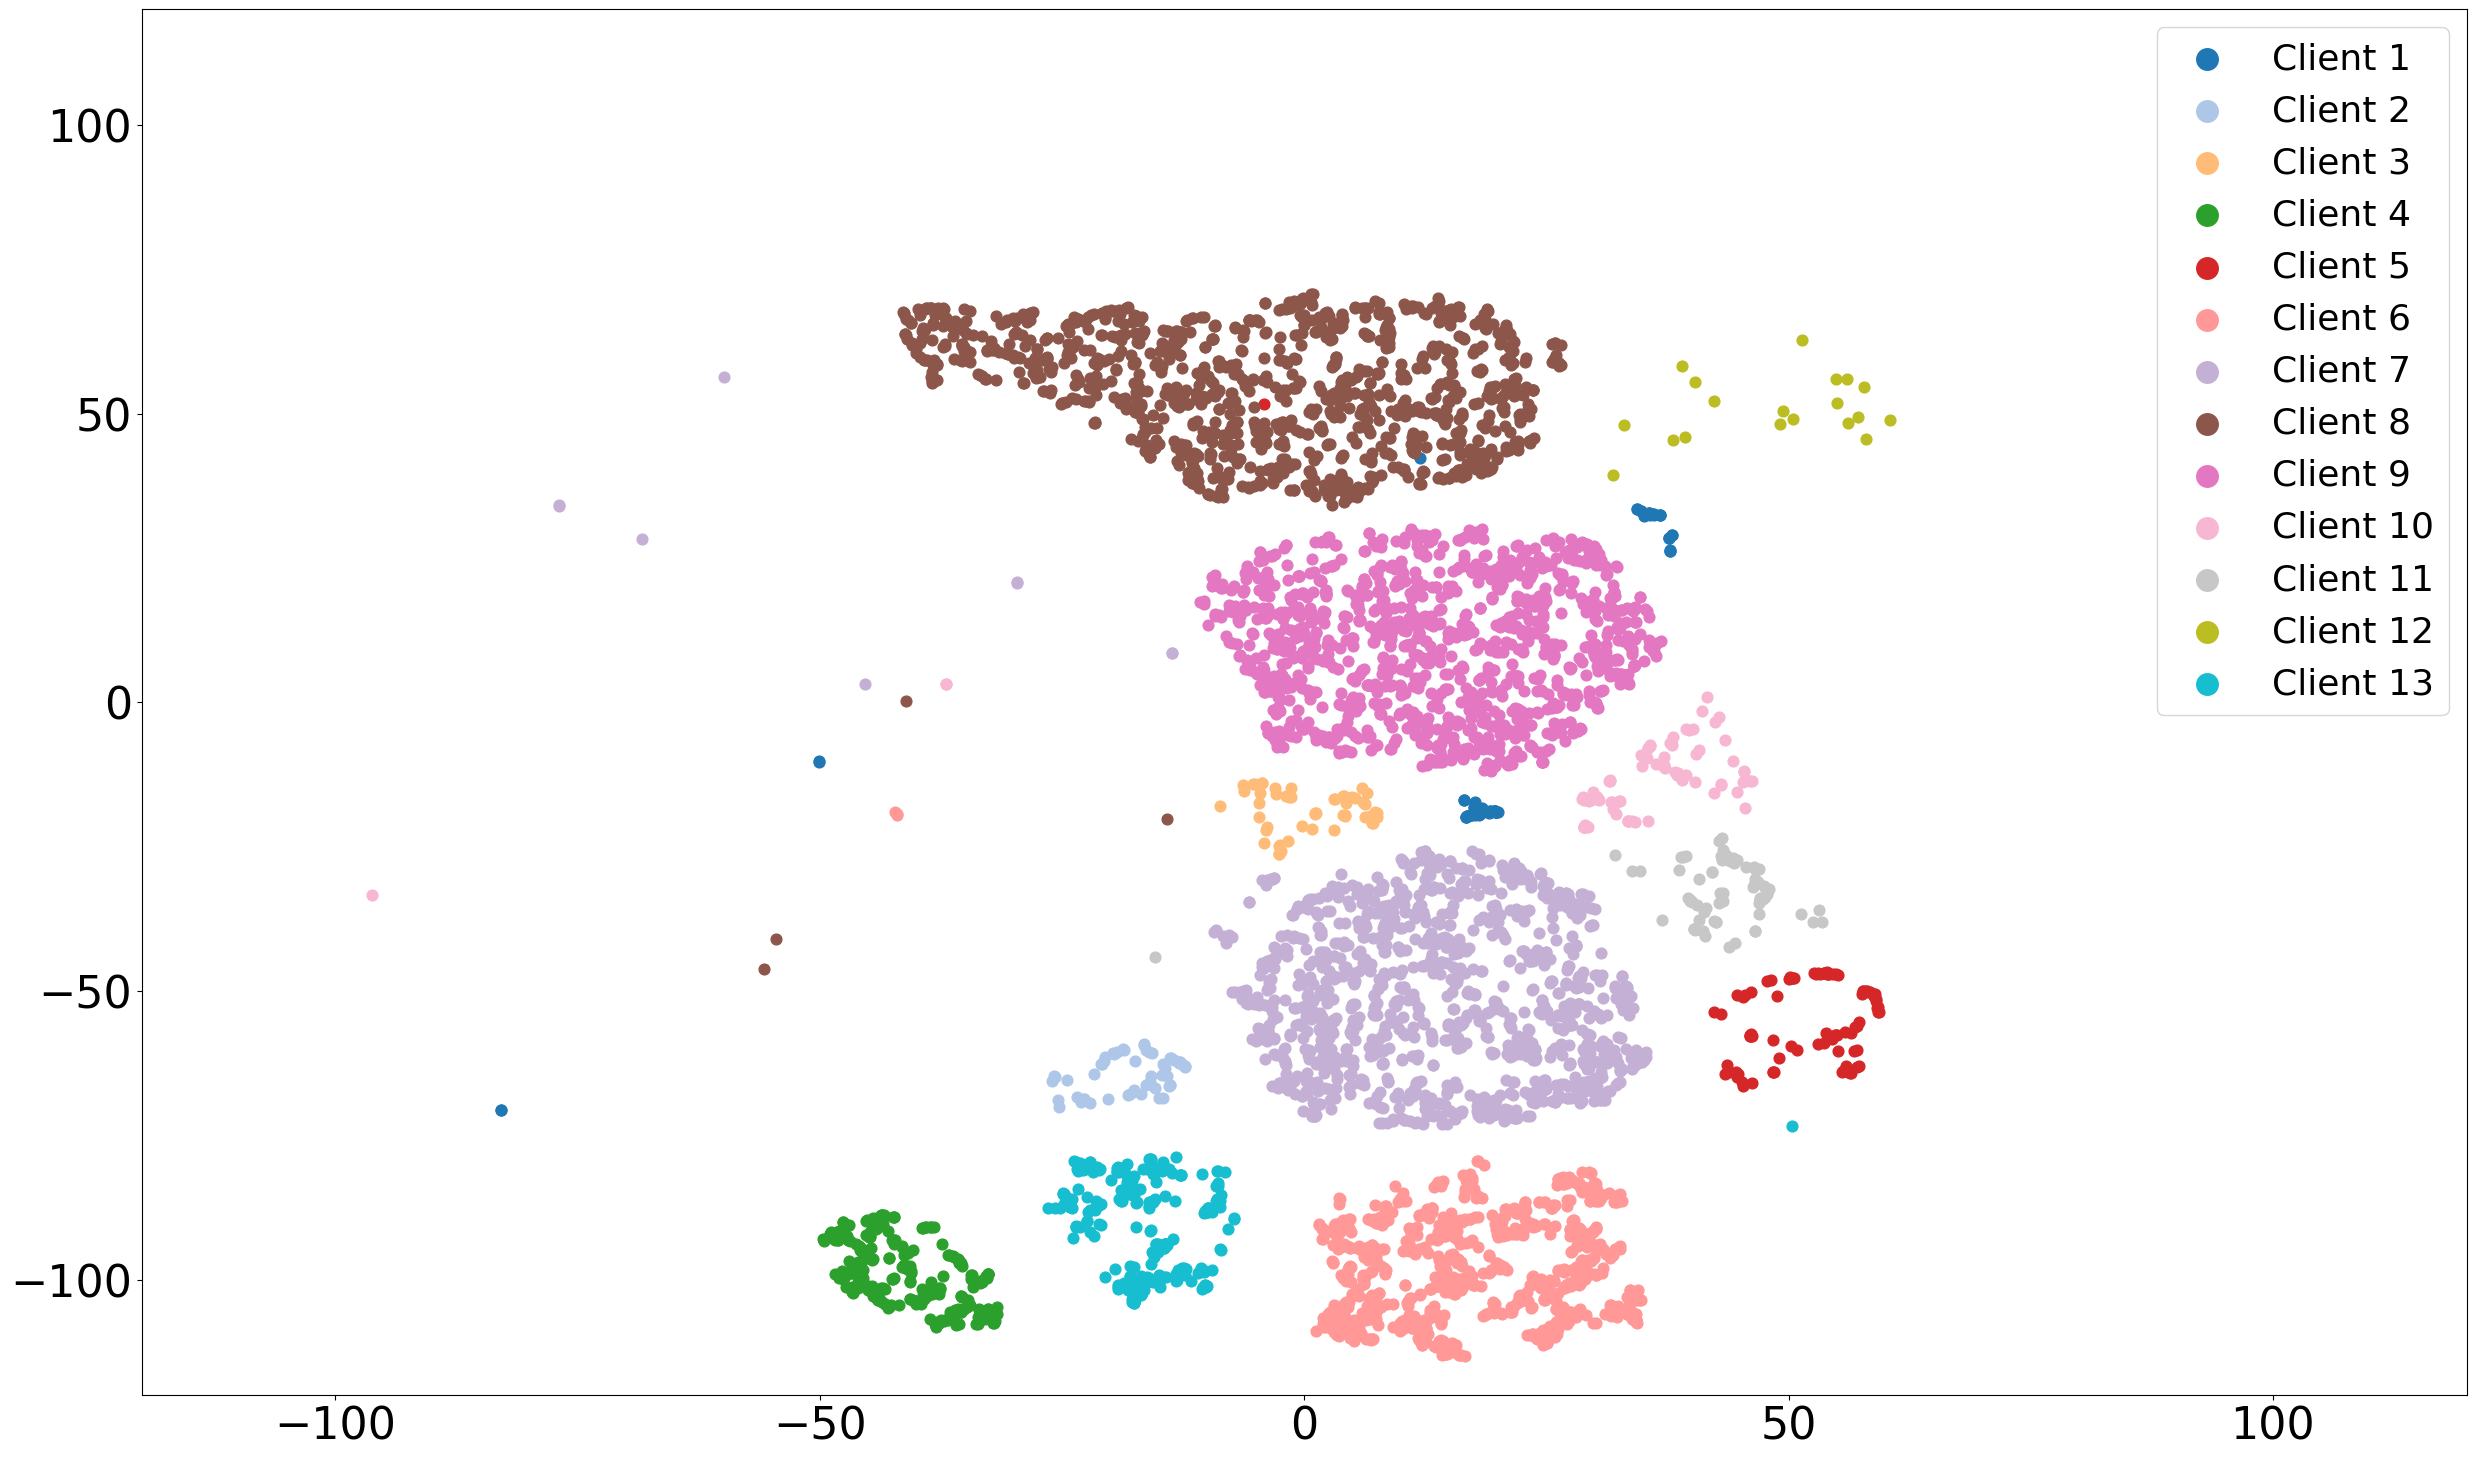

In [142]:

colors = []
NUM_COLORS = 13
cm = plt.get_cmap('tab20')
colors_use = list(map(cm, colors))
fig = plt.figure()
for client in range(1, client_num+1):
    data_size = X_embedded_local_global_clients[client].shape[0]
    colors_curr = data_size*[client]
    colors += colors_curr

ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for client in range(1, client_num+1):
    labels_0 = labels_clients[client] == 1
    X_embedded_local_global_clients_only_label_0 = X_embedded_local_global_clients[client][labels_0, :]
    ax.scatter(X_embedded_local_global_clients_only_label_0[:,0], X_embedded_local_global_clients_only_label_0[:,1], label = f'Client {client}', s=60)



#ax.legend_elements()
ax.legend(prop={'size': 26}, markerscale=2)

plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'local_global_comparison_label_1')